In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
#import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.base import ClassifierMixin
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# Evaluation
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
from sklearn.feature_selection import RFE

import gc
import random
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')

### 1. Read Data

In [2]:
train = pd.read_csv('trainset.csv', encoding='UTF-8')
test = pd.read_csv('testset_final.csv', encoding='UTF-8')
target = pd.read_csv('trainset.csv', encoding='UTF-8').매칭성공여부

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23009 entries, 0 to 23008
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         23009 non-null  object 
 1   접수일         23009 non-null  object 
 2   접수시각        3113 non-null   object 
 3   장기서비스여부     23009 non-null  int64  
 4   최초서비스일      23009 non-null  object 
 5   전체회차        23009 non-null  int64  
 6   현재회차        23009 non-null  int64  
 7   서비스일자       23009 non-null  object 
 8   서비스시작시간     23009 non-null  object 
 9   서비스종료시간     23009 non-null  object 
 10  기존고객여부      23009 non-null  int64  
 11  결재형태        23009 non-null  object 
 12  서비스주소       23009 non-null  object 
 13  주거형태        23009 non-null  object 
 14  평수          13856 non-null  object 
 15  고객가입일       23009 non-null  object 
 16  반려동물        20234 non-null  object 
 17  부재중여부       13856 non-null  float64
 18  우선청소        10979 non-null  object 
 19  쿠폰사용여부      23009 non-nul

In [4]:
train.query('매칭성공여부==1')['서비스주소'].value_counts()

충남 천안시     1193
충남 아산시      326
강원 원주시      230
광주 서구        39
서울 용산구       35
부산 강서구       33
부산 연제구       31
서울 강남구       29
경기 평택시       25
서울 강동구       21
서울 동작구       19
광주 광산구       18
광주 남구        16
서울 영등포구      15
서울 중구        15
서울 강서구       14
강원 춘천시       14
서울 성동구       13
서울 은평구       13
서울 동대문구      11
서울 마포구       10
부산 해운대구       8
서울 서초구        7
경기 안성시        6
경남 창원시        5
경기 의정부시       5
서울 종로구        5
서울 도봉구        4
부산 사하구        4
서울 강북구        4
서울 금천구        4
서울 성북구        3
부산 동구         3
서울 관악구        3
경기 성남시        3
광주 동구         3
서울 중랑구        3
광주 북구         2
부산 동래구        2
서울 노원구        2
서울 서대문구       1
서울 구로구        1
Name: 서비스주소, dtype: int64

In [5]:
train['n주소'] = train['서비스주소']

In [6]:
#n주소 변수 세분화 강화
train.loc[(train['서비스주소'] == '충남 천안시'), 'n주소'] = 6
train.loc[(train['서비스주소'] == '충남 아산시') | (train['서비스주소'] == '강원 원주시'), 'n주소'] = 5
train.loc[(train['서비스주소'] == '광주 서구') | (train['서비스주소'] == '서울 용산구') | (train['서비스주소'] == '부산 강서구') | (train['서비스주소'] == '부산 연제구'),'n주소'] = 4
train.loc[(train['서비스주소'] == '서울 강남구') | (train['서비스주소'] == '경기 평택시') | (train['서비스주소'] == '서울 강동구'), 'n주소'] = 3
train.loc[(train['서비스주소'] == '서울 동작구') | (train['서비스주소'] == '광주 광산구') | (train['서비스주소'] == '광주 남구') | (train['서비스주소'] == '서울 중구') | (train['서비스주소'] == '서울 영등포구') | (train['서비스주소'] == '강원 춘천시') | (train['서비스주소'] == '서울 강서구') | (train['서비스주소'] == '서울 성동구') | (train['서비스주소'] == '서울 은평구') | (train['서비스주소'] == '서울 동대문구') | (train['서비스주소'] == '서울 마포구'), 'n주소'] = 2
train.loc[(train['서비스주소'] == '부산 해운대구') | (train['서비스주소'] == '서울 서초구') | (train['서비스주소'] == '경기 안성시') | (train['서비스주소'] == '경남 창원시') | (train['서비스주소'] == '서울 종로구') | (train['서비스주소'] == '경기 의정부시') | (train['서비스주소'] == '서울 금천구') | (train['서비스주소'] == '서울 강북구') | (train['서비스주소'] == '서울 도봉구') | (train['서비스주소'] == '부산 사하구') | (train['서비스주소'] == '서울 성북구') | (train['서비스주소'] == '서울 관악구') | (train['서비스주소'] == '경기 성남시') | (train['서비스주소'] == '부산 동구') | (train['서비스주소'] == '광주 동구') | (train['서비스주소'] == '서울 중랑구') | (train['서비스주소'] == '광주 북구') | (train['서비스주소'] == '서울 노원구') | (train['서비스주소'] == '부산 동래구') | (train['서비스주소'] == '서울 구로구') | (train['서비스주소'] == '서울 서대문구'), 'n주소'] = 1

In [7]:
train['n주소'].isna().sum()

0

In [8]:
test['n주소'] = test['서비스주소']

In [9]:
test['서비스주소'].unique()

array(['충남 천안시', '충남 아산시', '서울 강남구', '서울 용산구', '서울 은평구', '서울 마포구',
       '서울 강서구', '서울 동작구', '서울 영등포구', '서울 중구', '서울 도봉구', '서울 강동구',
       '서울 성동구', '서울 서초구', '서울 강북구', '서울 동대문구', '서울 관악구', '경기 평택시',
       '경기 의정부시', '강원 원주시', '강원 춘천시', '서울 종로구', '광주 남구', '광주 서구',
       '서울 금천구', '서울 서대문구', '광주 북구', '광주 광산구', '광주 동구', '경기 안성시',
       '서울 중랑구', '서울 성북구', '부산 강서구', '부산 연제구', '부산 동구', '부산 해운대구',
       '부산 북구', '부산 사하구', '서울 노원구', '경기 화성시', '서울 광진구', '경기 성남시',
       '서울 구로구', '서울 송파구', '부산 부산진구', '부산 금정구', '부산 사상구'], dtype=object)

In [10]:
test['서비스주소'].value_counts()

충남 천안시     1766
강원 원주시      661
충남 아산시      424
서울 용산구      157
서울 강남구      114
경기 평택시      103
서울 동작구       75
서울 강동구       67
서울 영등포구      64
서울 성동구       63
서울 동대문구      58
광주 서구        57
서울 강서구       57
서울 마포구       51
서울 은평구       51
서울 서초구       48
서울 중구        47
광주 남구        40
광주 광산구       37
강원 춘천시       34
부산 해운대구      32
경기 안성시       30
서울 강북구       22
서울 성북구       20
경기 의정부시      18
서울 도봉구       16
서울 금천구       16
서울 중랑구       13
광주 동구        12
서울 노원구       11
광주 북구        11
서울 관악구       11
서울 종로구       10
부산 강서구       10
경기 성남시        9
부산 연제구        8
서울 구로구        4
서울 광진구        3
서울 서대문구       3
부산 동구         3
서울 송파구        2
부산 금정구        1
부산 북구         1
부산 부산진구       1
부산 사상구        1
경기 화성시        1
부산 사하구        1
Name: 서비스주소, dtype: int64

In [11]:
test.loc[(test['서비스주소'] == '충남 천안시'), 'n주소'] = 6
test.loc[(test['서비스주소'] == '충남 아산시') | (test['서비스주소'] == '강원 원주시'), 'n주소'] = 5
test.loc[(test['서비스주소'] == '광주 서구') | (test['서비스주소'] == '서울 용산구') | (test['서비스주소'] == '부산 강서구') | (test['서비스주소'] == '부산 연제구'), 'n주소'] = 4
test.loc[(test['서비스주소'] == '서울 강남구') | (test['서비스주소'] == '경기 평택시') | (test['서비스주소'] == '서울 강동구'), 'n주소'] = 3
test.loc[(test['서비스주소'] == '서울 동작구') | (test['서비스주소'] == '광주 광산구') | (test['서비스주소'] == '광주 남구') | (test['서비스주소'] == '서울 중구') | (test['서비스주소'] == '서울 영등포구') | (test['서비스주소'] == '강원 춘천시') | (test['서비스주소'] == '서울 강서구') | (test['서비스주소'] == '서울 성동구') | (test['서비스주소'] == '서울 은평구') | (test['서비스주소'] == '서울 동대문구') | (test['서비스주소'] == '서울 마포구'), 'n주소'] = 2
test.loc[(test['서비스주소'] == '부산 해운대구') | (test['서비스주소'] == '서울 서초구') | (test['서비스주소'] == '경기 안성시') | (test['서비스주소'] == '서울 종로구') | (test['서비스주소'] == '경기 의정부시') | (test['서비스주소'] == '서울 금천구') | (test['서비스주소'] == '서울 강북구') | (test['서비스주소'] == '서울 도봉구') | (test['서비스주소'] == '부산 사하구') | (test['서비스주소'] == '서울 성북구') | (test['서비스주소'] == '서울 관악구') | (test['서비스주소'] == '경기 성남시') | (test['서비스주소'] == '부산 동구') | (test['서비스주소'] == '광주 동구') | (test['서비스주소'] == '서울 중랑구') | (test['서비스주소'] == '광주 북구') | (test['서비스주소'] == '서울 노원구') | (test['서비스주소'] == '서울 구로구') | (test['서비스주소'] == '서울 서대문구') | (test['서비스주소'] == '부산 금정구') | (test['서비스주소'] == '경기 화성시') | (test['서비스주소'] == '부산 사상구') | (test['서비스주소'] == '서울 송파구') | (test['서비스주소'] == '부산 북구') | (test['서비스주소'] == '서울 광진구') | (test['서비스주소'] == '부산 부산진구'), 'n주소'] = 1

In [12]:
test['n주소'].isna().sum()

0

In [13]:
train = train.drop(columns=['매니저최초가입일','매니저최초서비스일','매니저주소'])
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23009 entries, 0 to 23008
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         23009 non-null  object 
 1   접수일         23009 non-null  object 
 2   접수시각        3113 non-null   object 
 3   장기서비스여부     23009 non-null  int64  
 4   최초서비스일      23009 non-null  object 
 5   전체회차        23009 non-null  int64  
 6   현재회차        23009 non-null  int64  
 7   서비스일자       23009 non-null  object 
 8   서비스시작시간     23009 non-null  object 
 9   서비스종료시간     23009 non-null  object 
 10  기존고객여부      23009 non-null  int64  
 11  결재형태        23009 non-null  object 
 12  서비스주소       23009 non-null  object 
 13  주거형태        23009 non-null  object 
 14  평수          13856 non-null  object 
 15  고객가입일       23009 non-null  object 
 16  반려동물        20234 non-null  object 
 17  부재중여부       13856 non-null  float64
 18  우선청소        10979 non-null  object 
 19  쿠폰사용여부      23009 non-nul

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         4244 non-null   object 
 1   접수일         4244 non-null   object 
 2   접수시각        900 non-null    object 
 3   장기서비스여부     4244 non-null   int64  
 4   최초서비스일      4244 non-null   object 
 5   전체회차        4244 non-null   int64  
 6   현재회차        4244 non-null   int64  
 7   서비스일자       4244 non-null   object 
 8   서비스시작시간     4244 non-null   object 
 9   서비스종료시간     4244 non-null   object 
 10  기존고객여부      4244 non-null   int64  
 11  결재형태        4238 non-null   object 
 12  서비스주소       4244 non-null   object 
 13  주거형태        4244 non-null   object 
 14  평수          2946 non-null   object 
 15  고객가입일       4084 non-null   object 
 16  반려동물        3868 non-null   object 
 17  부재중여부       2946 non-null   float64
 18  우선청소        2381 non-null   object 
 19  쿠폰사용여부      4244 non-null  

In [15]:
test['매니저생년월일'] = test['매니저생년월일'].astype(str)

In [16]:
# train 결측치 열 = 접수시각, 평수, 반려동물, 부재중여부, 우선청소, 매니저사용휴대폰, 매니저이동방법, CS교육이수여부, 청소교육이수여부
# test 결측치 열 = 접수시각, 결재형태, 평수, 고객가입일, 반려동물, 부재중여부, 우선청소, 매니저사용휴대폰, 매니저이동방법, CS교육이수여부, 청소교육이수여부
# 결재형태, 고객가입일이 추가됨

In [17]:
train['전체회차'].unique()

array([ 3,  4, 10,  2,  8,  1,  5,  7,  6,  9, 30], dtype=int64)

In [18]:
test['전체회차'].unique()

array([ 8,  4,  5,  3,  1,  9,  7,  2, 10,  6, 30], dtype=int64)

In [19]:
test['반려동물'].value_counts()

없음        3124
개          375
고양이        221
기타         143
개,고양이        3
개,기타         1
고양이,기타       1
Name: 반려동물, dtype: int64

In [20]:
test.loc[test['반려동물'] == "개,기타", '반려동물'] = "개"
test.loc[test['반려동물'] == "개,고양이", '반려동물'] = "개"
test.loc[test['반려동물'] == "고양이,기타", '반려동물'] = "고양이"

In [21]:
test['반려동물'].value_counts()

없음     3124
개       379
고양이     222
기타      143
Name: 반려동물, dtype: int64

In [22]:
train['매니저생년월일'] = train['매니저생년월일'].apply(lambda x : x[:4])
train['매니저생년월일'] 

0        1956
1        1976
2        1970
3        1956
4        1966
         ... 
23004    1970
23005    1969
23006    1971
23007    1967
23008    1968
Name: 매니저생년월일, Length: 23009, dtype: object

In [23]:
test['매니저생년월일'] 

0       1961
1       1961
2       1969
3       1961
4       1964
        ... 
4239    1961
4240    1976
4241    1961
4242    1964
4243    1971
Name: 매니저생년월일, Length: 4244, dtype: object

In [24]:
test.loc[test['매니저성별'] == 1, '매니저성별'] = 0

In [25]:
del train['접수시각']
train['평수'] = train['평수'].fillna('40평대이상')
train['반려동물'] = train['반려동물'].fillna('없음')
train['부재중여부'] = train['부재중여부'].fillna(0)
train['우선청소'] = train['우선청소'].fillna('화장실')
train['매니저사용휴대폰'] = train['매니저사용휴대폰'].fillna('안드로이드')
train['매니저이동방법'] = train['매니저이동방법'].fillna('대중교통')
train['CS교육이수여부'] = train['CS교육이수여부'].fillna(0)
train['청소교육이수여부'] = train['청소교육이수여부'].fillna(0)

del test['접수시각']
test['결재형태'] = test['결재형태'].fillna('신용카드')
test['평수'] = test['평수'].fillna('30평대')
#test['고객가입일'] = test['고객가입일'].fillna('2020-06-23')
test['반려동물'] = test['반려동물'].fillna('없음')
test['부재중여부'] = test['부재중여부'].fillna(0)
test['우선청소'] = test['우선청소'].fillna('화장실')
test['매니저사용휴대폰'] = test['매니저사용휴대폰'].fillna('안드로이드')
test['매니저이동방법'] = test['매니저이동방법'].fillna('대중교통')
test['CS교육이수여부'] = test['CS교육이수여부'].fillna(0)
test['청소교육이수여부'] = test['청소교육이수여부'].fillna(0)

In [26]:
test['고객가입일'] = test['고객가입일'].fillna('NAN')
test.loc[(test['최초서비스일'] == test['서비스일자']) & (test['고객가입일'] == 'NAN'),'고객가입일'] = test['최초서비스일']
test.loc[(test['고객가입일'] == 'NAN'),'고객가입일'] = test['접수일']

In [27]:
test['고객가입일'].unique()

array(['2020-03-25', '2019-06-01', '2020-01-02', '2021-06-28',
       '2019-07-08', '2020-06-23', '2019-08-05', '2020-10-07',
       '2020-10-19', '2019-08-30', '2020-06-22', '2019-04-11',
       '2020-08-20', '2020-02-13', '2021-05-26', '2019-09-30',
       '2020-06-24', '2020-07-15', '2019-09-16', '2019-10-15',
       '2020-02-06', '2021-11-12', '2021-06-11', '2020-01-17',
       '2021-03-12', '2020-08-24', '2021-06-18', '2019-10-16',
       '2021-06-16', '2020-05-15', '2021-07-09', '2020-09-09',
       '2020-11-18', '2021-10-18', '2020-09-11', '2021-04-29',
       '2021-09-23', '2021-03-08', '2020-05-26', '2021-06-10',
       '2021-10-20', '2019-06-24', '2021-05-18', '2021-04-07',
       '2019-08-23', '2020-11-19', '2020-11-20', '2021-06-22',
       '2020-03-11', '2019-10-25', '2020-09-02', '2019-05-23',
       '2020-08-05', '2019-04-27', '2019-07-31', '2019-05-16',
       '2019-06-27', '2020-09-04', '2021-04-23', '2021-04-20',
       '2019-08-21', '2019-12-05', '2019-12-12', '2021-

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23009 entries, 0 to 23008
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         23009 non-null  object 
 1   접수일         23009 non-null  object 
 2   장기서비스여부     23009 non-null  int64  
 3   최초서비스일      23009 non-null  object 
 4   전체회차        23009 non-null  int64  
 5   현재회차        23009 non-null  int64  
 6   서비스일자       23009 non-null  object 
 7   서비스시작시간     23009 non-null  object 
 8   서비스종료시간     23009 non-null  object 
 9   기존고객여부      23009 non-null  int64  
 10  결재형태        23009 non-null  object 
 11  서비스주소       23009 non-null  object 
 12  주거형태        23009 non-null  object 
 13  평수          23009 non-null  object 
 14  고객가입일       23009 non-null  object 
 15  반려동물        23009 non-null  object 
 16  부재중여부       23009 non-null  float64
 17  우선청소        23009 non-null  object 
 18  쿠폰사용여부      23009 non-null  int64  
 19  매니저생년월일     23009 non-nul

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         4244 non-null   object 
 1   접수일         4244 non-null   object 
 2   장기서비스여부     4244 non-null   int64  
 3   최초서비스일      4244 non-null   object 
 4   전체회차        4244 non-null   int64  
 5   현재회차        4244 non-null   int64  
 6   서비스일자       4244 non-null   object 
 7   서비스시작시간     4244 non-null   object 
 8   서비스종료시간     4244 non-null   object 
 9   기존고객여부      4244 non-null   int64  
 10  결재형태        4244 non-null   object 
 11  서비스주소       4244 non-null   object 
 12  주거형태        4244 non-null   object 
 13  평수          4244 non-null   object 
 14  고객가입일       4244 non-null   object 
 15  반려동물        4244 non-null   object 
 16  부재중여부       4244 non-null   float64
 17  우선청소        4244 non-null   object 
 18  쿠폰사용여부      4244 non-null   int64  
 19  매니저생년월일     4244 non-null  

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4244 entries, 0 to 4243
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SEQ         4244 non-null   object 
 1   접수일         4244 non-null   object 
 2   장기서비스여부     4244 non-null   int64  
 3   최초서비스일      4244 non-null   object 
 4   전체회차        4244 non-null   int64  
 5   현재회차        4244 non-null   int64  
 6   서비스일자       4244 non-null   object 
 7   서비스시작시간     4244 non-null   object 
 8   서비스종료시간     4244 non-null   object 
 9   기존고객여부      4244 non-null   int64  
 10  결재형태        4244 non-null   object 
 11  서비스주소       4244 non-null   object 
 12  주거형태        4244 non-null   object 
 13  평수          4244 non-null   object 
 14  고객가입일       4244 non-null   object 
 15  반려동물        4244 non-null   object 
 16  부재중여부       4244 non-null   float64
 17  우선청소        4244 non-null   object 
 18  쿠폰사용여부      4244 non-null   int64  
 19  매니저생년월일     4244 non-null  

In [31]:
# 분석에 필요없는 SEQ 필드를 데이터에서 제거하고, 전처리 후 학습용과 제출용 데이터를 분리하기 위해 SEQ는 보관한다.
train_SEQ = train['SEQ']
test_SEQ = test['SEQ']
del train['SEQ'], test['SEQ']

# 학습용 정답 데이터를 읽는다.
target = train['매칭성공여부']
del train['매칭성공여부']

# 전처리를 동일하게 적용하기 위해 두 데이터를 합한다.
features = pd.concat([train, test]).reset_index(drop=True)
features

,접수일,장기서비스여부,최초서비스일,전체회차,현재회차,서비스일자,서비스시작시간,서비스종료시간,기존고객여부,결재형태,...,매니저생년월일,매니저성별,매니저사용휴대폰,매니저이동방법,근무가능지역,CS교육이수여부,청소교육이수여부,부재중서비스가능여부,추천인여부,n주소
0,2019-07-09,1,2019-07-15,3,3,2019-07-29,9:00:00,13:00:00,1,무통장입금,...,1956,0,안드로이드,대중교통,서울,0.0,0.0,1,0,6
1,2019-07-12,1,2019-07-15,4,3,2019-08-20,10:00:00,16:00:00,1,무통장입금,...,1976,0,안드로이드,대중교통,천안/아산,1.0,1.0,1,0,6
2,2020-11-18,1,2020-11-23,10,6,2020-12-11,9:00:00,13:00:00,1,신용카드,...,1970,0,안드로이드,대중교통,천안/아산,0.0,0.0,0,0,6
3,2020-11-09,1,2020-11-09,4,4,2020-11-30,9:00:00,14:00:00,1,무통장입금,...,1956,0,안드로이드,대중교통,서울,0.0,0.0,1,0,2
4,2020-02-25,1,2020-03-31,2,2,2020-04-07,9:00:00,13:00:00,1,무통장입금,...,1966,0,안드로이드,대중교통,천안/아산,0.0,0.0,1,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,2020-09-28,1,2020-10-05,8,1,2020-10-05,9:00:00,13:00:00,1,신용카드,...,1961,0,안드로이드,대중교통,천안/아산,0.0,0.0,1,0,6
27249,2020-01-01,1,2020-01-07,4,1,2020-01-07,14:00:00,18:00:00,0,무통장입금,...,1976,0,안드로이드,자차,천안/아산,0.0,0.0,1,0,6
27250,2020-12-10,1,2020-12-17,4,1,2020-12-17,9:00:00,13:00:00,1,신용카드,...,1961,0,안드로이드,대중교통,천안/아산,0.0,0.0,1,0,6
27251,2020-01-02,1,2020-01-09,8,6,2020-02-20,9:00:00,13:00:00,1,무통장입금,...,1964,0,기타,자차,천안/아산,0.0,0.0,0,0,5


In [32]:
#시간 관련 
features[['고객가입일','접수일','최초서비스일','서비스일자','서비스시작시간','서비스종료시간','매니저생년월일']]

,고객가입일,접수일,최초서비스일,서비스일자,서비스시작시간,서비스종료시간,매니저생년월일
0,2019-04-22,2019-07-09,2019-07-15,2019-07-29,9:00:00,13:00:00,1956
1,2019-05-21,2019-07-12,2019-07-15,2019-08-20,10:00:00,16:00:00,1976
2,2020-10-14,2020-11-18,2020-11-23,2020-12-11,9:00:00,13:00:00,1970
3,2020-02-06,2020-11-09,2020-11-09,2020-11-30,9:00:00,14:00:00,1956
4,2019-09-20,2020-02-25,2020-03-31,2020-04-07,9:00:00,13:00:00,1966
...,...,...,...,...,...,...,...
27248,2020-02-13,2020-09-28,2020-10-05,2020-10-05,9:00:00,13:00:00,1961
27249,2020-01-07,2020-01-01,2020-01-07,2020-01-07,14:00:00,18:00:00,1976
27250,2019-04-11,2020-12-10,2020-12-17,2020-12-17,9:00:00,13:00:00,1961
27251,2019-06-20,2020-01-02,2020-01-09,2020-02-20,9:00:00,13:00:00,1964


In [33]:
features['가입월'] = features['고객가입일'].apply(lambda x : int(x[5:7]))
features['가입시즌별구분'] = features['가입월'].apply(lambda x : '시즌초' if (x>=3) and (x<=9)
                                                  else '시즌말' if (x>=9) and (x<=11)
                                                  else '휴식기')
features['가입계절'] = features['가입월'].apply(lambda x : '봄' if (x>=3) and (x<=5)
                                                  else '여름' if (x>=6) and (x<=8)
                                                  else '가을' if (x>=9) and (x<=11)
                                                  else '겨울')
features['가입일'] = features['고객가입일'].apply(lambda x : int(x[8:]))
features['가입일구분'] = pd.cut(features['가입일'], bins = [1, 10, 20, 32], 
                              right = False, labels = ['초기', '중기', '말기'])
features['가입연도'] = features['고객가입일'].apply(lambda x : x[:4])

In [34]:
features['접수월'] = features['접수일'].apply(lambda x : int(x[5:7]))
features['접수시즌별구분'] = features['접수월'].apply(lambda x : '시즌초' if (x>=3) and (x<=9)
                                                  else '시즌말' if (x>=9) and (x<=11)
                                                  else '휴식기')
features['접수계절'] = features['접수월'].apply(lambda x : '봄' if (x>=3) and (x<=5)
                                                  else '여름' if (x>=6) and (x<=8)
                                                  else '가을' if (x>=9) and (x<=11)
                                                  else '겨울')
features['접수일자'] = features['접수일'].apply(lambda x : int(x[8:]))
features['접수일구분'] = pd.cut(features['접수일자'], bins = [1, 10, 20, 32], 
                              right = False, labels = ['초기', '중기', '말기'])
features['접수연도'] = features['접수일'].apply(lambda x : x[:4])

In [35]:
features['최초서비스월'] = features['최초서비스일'].apply(lambda x : int(x[5:7]))
features['최초서비스시즌별구분'] = features['최초서비스월'].apply(lambda x : '시즌초' if (x>=3) and (x<=9)
                                                  else '시즌말' if (x>=9) and (x<=11)
                                                  else '휴식기')
features['최초서비스계절'] = features['최초서비스월'].apply(lambda x : '봄' if (x>=3) and (x<=5)
                                                  else '여름' if (x>=6) and (x<=8)
                                                  else '가을' if (x>=9) and (x<=11)
                                                  else '겨울')
features['최초서비스일자'] = features['최초서비스일'].apply(lambda x : int(x[8:]))
features['최초서비스일구분'] = pd.cut(features['최초서비스일자'], bins = [1, 10, 20, 32], 
                              right = False, labels = ['초기', '중기', '말기'])
features['최초서비스연도'] = features['최초서비스일'].apply(lambda x : x[:4])

In [36]:
features['서비스월'] = features['서비스일자'].apply(lambda x : int(x[5:7]))
features['서비스시즌별구분'] = features['서비스월'].apply(lambda x : '시즌초' if (x>=3) and (x<=9)
                                                  else '시즌말' if (x>=9) and (x<=11)
                                                  else '휴식기')
features['서비스계절'] = features['서비스월'].apply(lambda x : '봄' if (x>=3) and (x<=5)
                                                  else '여름' if (x>=6) and (x<=8)
                                                  else '가을' if (x>=9) and (x<=11)
                                                  else '겨울')
features['서비스일'] = features['서비스일자'].apply(lambda x : int(x[8:]))
features['서비스일구분'] = pd.cut(features['서비스일'], bins = [1, 10, 20, 32], 
                              right = False, labels = ['초기', '중기', '말기'])
features['서비스연도'] = features['서비스일자'].apply(lambda x : x[:4])

In [37]:
features['매니저세대세분화'] = features['매니저생년월일'].apply(lambda x : int(x[2]))
features['매니저세대세분화'] = features['매니저세대세분화'].apply(lambda x : '90년대' if x == 9
                                                 else '80년대' if x == 8
                                                 else '70년대' if x == 7
                                                 else '60년대' if x == 6
                                                 else '50년대' if x == 5
                                                 else '40년대' if x == 4
                                                 else '30년대' if x == 3
                                                 else '20년대' if x == 2
                                                 else '10년대' if x == 1
                                                 else '00년대')
features['매니저세대연도세분화'] = features['매니저생년월일'].apply(lambda x : int(x[3]))
features['매니저세대연도세분화'] = features['매니저세대연도세분화'].apply(lambda x : '세대초기' if (x>=0) and (x<=2)
                                                                else '세대중기' if (x>=3) and (x<=5)
                                                                else '세대말기')

In [38]:
features

,접수일,장기서비스여부,최초서비스일,전체회차,현재회차,서비스일자,서비스시작시간,서비스종료시간,기존고객여부,결재형태,...,최초서비스일구분,최초서비스연도,서비스월,서비스시즌별구분,서비스계절,서비스일,서비스일구분,서비스연도,매니저세대세분화,매니저세대연도세분화
0,2019-07-09,1,2019-07-15,3,3,2019-07-29,9:00:00,13:00:00,1,무통장입금,...,중기,2019,7,시즌초,여름,29,말기,2019,50년대,세대말기
1,2019-07-12,1,2019-07-15,4,3,2019-08-20,10:00:00,16:00:00,1,무통장입금,...,중기,2019,8,시즌초,여름,20,말기,2019,70년대,세대말기
2,2020-11-18,1,2020-11-23,10,6,2020-12-11,9:00:00,13:00:00,1,신용카드,...,말기,2020,12,휴식기,겨울,11,중기,2020,70년대,세대초기
3,2020-11-09,1,2020-11-09,4,4,2020-11-30,9:00:00,14:00:00,1,무통장입금,...,초기,2020,11,시즌말,가을,30,말기,2020,50년대,세대말기
4,2020-02-25,1,2020-03-31,2,2,2020-04-07,9:00:00,13:00:00,1,무통장입금,...,말기,2020,4,시즌초,봄,7,초기,2020,60년대,세대말기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,2020-09-28,1,2020-10-05,8,1,2020-10-05,9:00:00,13:00:00,1,신용카드,...,초기,2020,10,시즌말,가을,5,초기,2020,60년대,세대초기
27249,2020-01-01,1,2020-01-07,4,1,2020-01-07,14:00:00,18:00:00,0,무통장입금,...,초기,2020,1,휴식기,겨울,7,초기,2020,70년대,세대말기
27250,2020-12-10,1,2020-12-17,4,1,2020-12-17,9:00:00,13:00:00,1,신용카드,...,중기,2020,12,휴식기,겨울,17,중기,2020,60년대,세대초기
27251,2020-01-02,1,2020-01-09,8,6,2020-02-20,9:00:00,13:00:00,1,무통장입금,...,초기,2020,2,휴식기,겨울,20,말기,2020,60년대,세대중기


In [39]:
features['고객가입일'] = pd.to_datetime(features['고객가입일'], format= '%Y-%m-%d')
features['접수일'] = pd.to_datetime(features['접수일'], format= '%Y-%m-%d')
features['최초서비스일'] = pd.to_datetime(features['최초서비스일'], format= '%Y-%m-%d')
features['서비스일자'] = pd.to_datetime(features['서비스일자'], format= '%Y-%m-%d')
features['서비스시작시간'] = pd.to_datetime(features['서비스시작시간'], format= '%H:%M:%S')
features['서비스종료시간'] = pd.to_datetime(features['서비스종료시간'], format= '%H:%M:%S')

In [40]:
features[['고객가입일','접수일','최초서비스일','서비스일자','서비스시작시간','서비스종료시간','매니저생년월일']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27253 entries, 0 to 27252
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   고객가입일    27253 non-null  datetime64[ns]
 1   접수일      27253 non-null  datetime64[ns]
 2   최초서비스일   27253 non-null  datetime64[ns]
 3   서비스일자    27253 non-null  datetime64[ns]
 4   서비스시작시간  27253 non-null  datetime64[ns]
 5   서비스종료시간  27253 non-null  datetime64[ns]
 6   매니저생년월일  27253 non-null  object        
dtypes: datetime64[ns](6), object(1)
memory usage: 1.5+ MB


In [41]:
features['회원기간(달)'] = features['서비스일자'] - features['고객가입일']
features['회원기간(달)'] = features['회원기간(달)'].astype(str)
features['회원기간(달)'] = features['회원기간(달)'].apply(lambda x : x.split("days")[0])
features['회원기간(달)'] = features['회원기간(달)'].astype(int)
features['회원기간(달)'] = features['회원기간(달)'].apply(lambda x : round(x/31))

<AxesSubplot:>

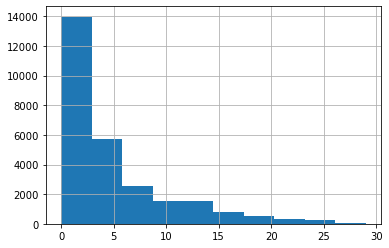

In [42]:
features['회원기간(달)'].hist()

In [43]:
features['서비스이용시간'] = features['서비스종료시간'] - features['서비스시작시간']
features['서비스이용시간'] = features['서비스이용시간'].astype(str)
features['서비스이용시간'] = features['서비스이용시간'].apply(lambda x : x.split("days")[1])
features['서비스이용시간'] = features['서비스이용시간'].apply(lambda x : x[:3]).astype(int)
features['서비스이용시간']

0        4
1        6
2        4
3        5
4        4
        ..
27248    4
27249    4
27250    4
27251    4
27252    5
Name: 서비스이용시간, Length: 27253, dtype: int32

In [44]:
features['서비스이용시간'].unique()

array([4, 6, 5, 3, 2, 9, 7, 8])

In [45]:
features['전체서비스이용시간'] = features['전체회차'] * features['서비스이용시간']

<AxesSubplot:>

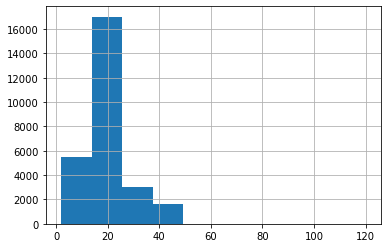

In [46]:
features['전체서비스이용시간'].hist()

In [47]:
features['고객등급분류'] = features['전체서비스이용시간'].apply(lambda x : 'Silver' if (x>=1) and (x<=10)
                                                 else 'Gold' if (x>=11) and (x<=30)
                                                 else 'Diamond' if (x>=31) and (x<=60)
                                                 else 'VIP')

In [48]:
features['고객등급분류'].value_counts()

Gold       19379
Silver      4013
Diamond     3820
VIP           41
Name: 고객등급분류, dtype: int64

In [49]:
features['전체회차'].unique()

array([ 3,  4, 10,  2,  8,  1,  5,  7,  6,  9, 30], dtype=int64)

In [50]:
features['서비스규모구분'] = features['전체회차'].apply(lambda x : 1 if x>=4 else 0)
features['서비스규모구분']

0        0
1        1
2        1
3        1
4        0
        ..
27248    1
27249    1
27250    1
27251    1
27252    0
Name: 서비스규모구분, Length: 27253, dtype: int64

In [51]:
features['장기노동여부'] = features['서비스이용시간'].apply(lambda x : 1 if x>=8 else 0)
features['장기노동여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    0
27250    0
27251    0
27252    0
Name: 장기노동여부, Length: 27253, dtype: int64

In [52]:
features['단기노동여부'] = features['서비스이용시간'].apply(lambda x : 1 if x>4 else 0)
features['단기노동여부']

0        0
1        1
2        0
3        1
4        0
        ..
27248    0
27249    0
27250    0
27251    0
27252    1
Name: 단기노동여부, Length: 27253, dtype: int64

In [53]:
features['휴면기간(일)'] = features['접수일'] - features['고객가입일']
features['휴면기간(일)'] = features['휴면기간(일)'].astype(str)
features['휴면기간(일)'] = features['휴면기간(일)'].apply(lambda x : x.split("days")[0])
features['휴면기간(일)'] = features['휴면기간(일)'].astype(int)
features['휴면기간(일)']

0         78
1         52
2         35
3        277
4        158
        ... 
27248    228
27249     -6
27250    609
27251    196
27252     -2
Name: 휴면기간(일), Length: 27253, dtype: int32

In [54]:
features['다이렉트접수여부'] = features['휴면기간(일)'].apply(lambda x: 1 if x<0 else 0)
features['다이렉트접수여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    1
27250    0
27251    0
27252    1
Name: 다이렉트접수여부, Length: 27253, dtype: int64

In [55]:
features['대기기간(일)'] = features['최초서비스일'] - features['고객가입일']
features['대기기간(일)'] = features['대기기간(일)'].astype(str)
features['대기기간(일)'] = features['대기기간(일)'].apply(lambda x : x.split("days")[0])
features['대기기간(일)'] = features['대기기간(일)'].astype(int)
features['대기기간(일)']

0         84
1         55
2         40
3        277
4        193
        ... 
27248    235
27249      0
27250    616
27251    203
27252      0
Name: 대기기간(일), Length: 27253, dtype: int32

In [56]:
features['다이렉트서비스여부'] = features['대기기간(일)'].apply(lambda x: 1 if x<0 else 0)
features['다이렉트서비스여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    0
27250    0
27251    0
27252    0
Name: 다이렉트서비스여부, Length: 27253, dtype: int64

In [57]:
features['준비기간(일)'] = features['최초서비스일'] - features['접수일']
features['준비기간(일)'] = features['준비기간(일)'].astype(str)
features['준비기간(일)'] = features['준비기간(일)'].apply(lambda x : x.split("days")[0])
features['준비기간(일)'] = features['준비기간(일)'].astype(int)
features['준비기간(일)']

0         6
1         3
2         5
3         0
4        35
         ..
27248     7
27249     6
27250     7
27251     7
27252     2
Name: 준비기간(일), Length: 27253, dtype: int32

In [58]:
features['new다이렉트서비스여부'] = features['준비기간(일)'].apply(lambda x: 1 if x<0 else 0)
features['new다이렉트서비스여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    0
27250    0
27251    0
27252    0
Name: new다이렉트서비스여부, Length: 27253, dtype: int64

In [59]:
features['클리닉기간(일)'] = features['서비스일자'] - features['최초서비스일']
features['클리닉기간(일)'] = features['클리닉기간(일)'].astype(str)
features['클리닉기간(일)'] = features['클리닉기간(일)'].apply(lambda x : x.split("days")[0])
features['클리닉기간(일)'] = features['클리닉기간(일)'].astype(int)
features['클리닉기간(일)']

0        14
1        36
2        18
3        21
4         7
         ..
27248     0
27249     0
27250     0
27251    42
27252     0
Name: 클리닉기간(일), Length: 27253, dtype: int32

In [60]:
now = 2021

In [61]:
features['매니저나이'] = features['매니저생년월일'].apply(lambda x : now - int(x))
features['매니저나이']

0        65
1        45
2        51
3        65
4        55
         ..
27248    60
27249    45
27250    60
27251    57
27252    50
Name: 매니저나이, Length: 27253, dtype: int64

In [62]:
features['고객가입일'] = features['고객가입일'].astype(str)
features['접수일'] = features['접수일'].astype(str)
features['최초서비스일'] = features['최초서비스일'].astype(str)
features['서비스일자'] = features['서비스일자'].astype(str)
features['서비스시작시간'] = features['서비스시작시간'].astype(str)
features['서비스종료시간'] = features['서비스종료시간'].astype(str)
features['매니저생년월일'] = features['매니저생년월일'].astype(str)

In [63]:
features['서비스일자일치여부'] = features['최초서비스일'] == features['서비스일자']
features['서비스일자일치여부'] = features['서비스일자일치여부'].astype(int)
features['서비스일자일치여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    1
27249    1
27250    1
27251    0
27252    1
Name: 서비스일자일치여부, Length: 27253, dtype: int32

In [64]:
features['즉흥서비스여부'] = features['최초서비스일'] == features['고객가입일']
features['즉흥서비스여부'] = features['즉흥서비스여부'].astype(int)
features['즉흥서비스여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    1
27250    0
27251    0
27252    1
Name: 즉흥서비스여부, Length: 27253, dtype: int32

In [65]:
features['타겟팅고객여부'] = features['서비스일자일치여부'] + features['즉흥서비스여부']
features['타겟팅고객여부'] = features['타겟팅고객여부'].apply(lambda x : 1 if x==2 else 0)
features['타겟팅고객여부']

0        0
1        0
2        0
3        0
4        0
        ..
27248    0
27249    1
27250    0
27251    0
27252    1
Name: 타겟팅고객여부, Length: 27253, dtype: int64

In [66]:
#서비스진행도
features['서비스진행도'] = (features['현재회차']/features['전체회차']).apply(lambda x : round(x,3))
features['서비스진행도']

0        1.000
1        0.750
2        0.600
3        1.000
4        1.000
         ...  
27248    0.125
27249    0.250
27250    0.250
27251    0.750
27252    1.000
Name: 서비스진행도, Length: 27253, dtype: float64

In [67]:
features.loc[features['결재형태']=="미수",'결재형태'] = '신용카드'

In [68]:
features.loc[features.서비스주소.isin(['충남 천안시','충남 아산시']), '서비스주소'] = '천안/아산'
features.loc[features.서비스주소.isin(['서울 광진구','서울 송파구','서울 강서구','서울 은평구','서울 용산구','서울 강동구','서울 강남구','서울 영등포구','서울 금천구','서울 동작구','서울 동대문구','서울 관악구','서울 성동구','서울 중구','서울 성북구','서울 서초구','서울 강북구','서울 마포구','서울 서대문구','서울 종로구','서울 도봉구','서울 노원구','서울 중랑구','서울 구로구']), '서비스주소'] = '서울'
features.loc[features.서비스주소.isin(['강원 원주시','강원 춘천시']), '서비스주소'] = '원주/춘천'
features.loc[features.서비스주소.isin(['경기 평택시']), '서비스주소'] = '평택'
features.loc[features.서비스주소.isin(['광주 북구','광주 남구','광주 광산구','광주 서구','광주 동구']), '서비스주소'] = '광주'
features.loc[features.서비스주소.isin(['경기 성남시','경기 의정부시','경기 안성시','경기 화성시']), '서비스주소'] = '수도권'
features.loc[features.서비스주소.isin(['부산 강서구','부산 연제구','부산 해운대구','부산 사하구','부산 동래구','부산 동구','부산 북구','부산 부산진구','부산 금정구','부산 사상구']), '서비스주소'] = '부산'
features.loc[features.서비스주소.isin(['경남 창원시']), '서비스주소'] = '기타'

In [69]:
features['서비스주소'].unique()

array(['천안/아산', '서울', '원주/춘천', '광주', '평택', '수도권', '부산', '기타'],
      dtype=object)

In [70]:
features['근무가능지역'].unique()

array(['서울', '천안/아산', '원주/춘천', '기타', '평택', '광주', '수도권', '부산'],
      dtype=object)

In [71]:
features[['서비스주소','근무가능지역']]

,서비스주소,근무가능지역
0,천안/아산,서울
1,천안/아산,천안/아산
2,천안/아산,천안/아산
3,서울,서울
4,천안/아산,천안/아산
...,...,...
27248,천안/아산,천안/아산
27249,천안/아산,천안/아산
27250,천안/아산,천안/아산
27251,천안/아산,천안/아산


In [72]:
features['근무가능지역여부'] = features['서비스주소'] == features['근무가능지역']
features['근무가능지역여부'] = features['근무가능지역여부'].astype(int)
features['근무가능지역여부']

0        0
1        1
2        1
3        1
4        1
        ..
27248    1
27249    1
27250    1
27251    1
27252    1
Name: 근무가능지역여부, Length: 27253, dtype: int32

In [73]:
features['여부총합'] = features['장기서비스여부'] + features['기존고객여부'] + features['부재중여부'] + features['쿠폰사용여부'] + features['CS교육이수여부'] + features['청소교육이수여부'] + features['부재중서비스가능여부'] + features['추천인여부'] +features['서비스규모구분'] +features['장기노동여부'] +features['단기노동여부'] +features['다이렉트접수여부'] +features['다이렉트서비스여부'] +features['new다이렉트서비스여부'] + features['근무가능지역여부'] + features['타겟팅고객여부'] + features['타겟팅고객여부']
features['여부총합'] 

0        3.0
1        8.0
2        4.0
3        6.0
4        4.0
        ... 
27248    6.0
27249    7.0
27250    5.0
27251    5.0
27252    9.0
Name: 여부총합, Length: 27253, dtype: float64

In [74]:
features['가입월'] = features['가입월'].astype(str)
features['가입일'] = features['가입일'].astype(str)
features['접수월'] = features['접수월'].astype(str)
features['접수일자'] = features['접수일자'].astype(str)
features['최초서비스월'] = features['최초서비스월'].astype(str)
features['최초서비스일자'] = features['최초서비스일자'].astype(str)
features['서비스월'] = features['서비스월'].astype(str)
features['서비스일'] = features['서비스일'].astype(str)

In [75]:
# 범주형 변수와 수치형 변수를 분리

cat_features = features.select_dtypes(include=['object','category']).columns.to_list()
num_features = features.select_dtypes(exclude=['object','category']).columns.to_list()

In [76]:
features[cat_features]

,접수일,최초서비스일,서비스일자,서비스시작시간,서비스종료시간,결재형태,서비스주소,주거형태,평수,고객가입일,...,최초서비스연도,서비스월,서비스시즌별구분,서비스계절,서비스일,서비스일구분,서비스연도,매니저세대세분화,매니저세대연도세분화,고객등급분류
0,2019-07-09,2019-07-15,2019-07-29,1900-01-01 09:00:00,1900-01-01 13:00:00,무통장입금,천안/아산,일반주택,40평대이상,2019-04-22,...,2019,7,시즌초,여름,29,말기,2019,50년대,세대말기,Gold
1,2019-07-12,2019-07-15,2019-08-20,1900-01-01 10:00:00,1900-01-01 16:00:00,무통장입금,천안/아산,일반주택,40평대이상,2019-05-21,...,2019,8,시즌초,여름,20,말기,2019,70년대,세대말기,Gold
2,2020-11-18,2020-11-23,2020-12-11,1900-01-01 09:00:00,1900-01-01 13:00:00,신용카드,천안/아산,일반주택,40평대이상,2020-10-14,...,2020,12,휴식기,겨울,11,중기,2020,70년대,세대초기,Diamond
3,2020-11-09,2020-11-09,2020-11-30,1900-01-01 09:00:00,1900-01-01 14:00:00,무통장입금,서울,일반주택,30평대,2020-02-06,...,2020,11,시즌말,가을,30,말기,2020,50년대,세대말기,Gold
4,2020-02-25,2020-03-31,2020-04-07,1900-01-01 09:00:00,1900-01-01 13:00:00,무통장입금,천안/아산,일반주택,40평대이상,2019-09-20,...,2020,4,시즌초,봄,7,초기,2020,60년대,세대말기,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,2020-09-28,2020-10-05,2020-10-05,1900-01-01 09:00:00,1900-01-01 13:00:00,신용카드,천안/아산,일반주택,40평대이상,2020-02-13,...,2020,10,시즌말,가을,5,초기,2020,60년대,세대초기,Diamond
27249,2020-01-01,2020-01-07,2020-01-07,1900-01-01 14:00:00,1900-01-01 18:00:00,무통장입금,천안/아산,일반주택,30평대,2020-01-07,...,2020,1,휴식기,겨울,7,초기,2020,70년대,세대말기,Gold
27250,2020-12-10,2020-12-17,2020-12-17,1900-01-01 09:00:00,1900-01-01 13:00:00,신용카드,천안/아산,일반주택,40평대이상,2019-04-11,...,2020,12,휴식기,겨울,17,중기,2020,60년대,세대초기,Gold
27251,2020-01-02,2020-01-09,2020-02-20,1900-01-01 09:00:00,1900-01-01 13:00:00,무통장입금,천안/아산,일반주택,30평대,2019-06-20,...,2020,2,휴식기,겨울,20,말기,2020,60년대,세대중기,Diamond


In [77]:
features = pd.concat([pd.concat([train_SEQ, test_SEQ]).reset_index(drop=True), features], axis=1)
X_train = features.query('SEQ in @train_SEQ').drop('SEQ', axis=1)
X_test = features.query('SEQ in @test_SEQ').drop('SEQ', axis=1)

In [78]:
X_train = pd.concat([X_train,target],axis=1)
X_train

,접수일,장기서비스여부,최초서비스일,전체회차,현재회차,서비스일자,서비스시작시간,서비스종료시간,기존고객여부,결재형태,...,new다이렉트서비스여부,클리닉기간(일),매니저나이,서비스일자일치여부,즉흥서비스여부,타겟팅고객여부,서비스진행도,근무가능지역여부,여부총합,매칭성공여부
0,2019-07-09,1,2019-07-15,3,3,2019-07-29,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,...,0,14,65,0,0,0,1.00,0,3.0,0
1,2019-07-12,1,2019-07-15,4,3,2019-08-20,1900-01-01 10:00:00,1900-01-01 16:00:00,1,무통장입금,...,0,36,45,0,0,0,0.75,1,8.0,0
2,2020-11-18,1,2020-11-23,10,6,2020-12-11,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0,18,51,0,0,0,0.60,1,4.0,0
3,2020-11-09,1,2020-11-09,4,4,2020-11-30,1900-01-01 09:00:00,1900-01-01 14:00:00,1,무통장입금,...,0,21,65,0,0,0,1.00,1,6.0,0
4,2020-02-25,1,2020-03-31,2,2,2020-04-07,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,...,0,7,55,0,0,0,1.00,1,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23004,2021-01-05,1,2021-01-06,4,1,2021-01-06,1900-01-01 16:00:00,1900-01-01 18:00:00,1,신용카드,...,0,0,51,1,0,0,0.25,0,5.0,0
23005,2020-02-03,1,2020-03-02,10,9,2020-06-15,1900-01-01 14:00:00,1900-01-01 18:00:00,1,신용카드,...,0,105,52,0,0,0,0.90,1,6.0,1
23006,2021-04-30,1,2021-05-20,4,3,2021-06-16,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0,27,50,0,0,0,0.75,0,5.0,0
23007,2019-07-08,1,2019-07-10,4,3,2019-07-24,1900-01-01 14:00:00,1900-01-01 18:00:00,1,신용카드,...,0,14,54,0,0,0,0.75,1,7.0,0


In [79]:
X_train['주거형태'].unique()

array(['일반주택', '오피스텔/원룸'], dtype=object)

In [80]:
X_test['주거형태'].unique()

array(['일반주택', '오피스텔/원룸'], dtype=object)

In [81]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('주거형태')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'주거형태_mean_enc'] = X_train['주거형태'].map(smooth)

주거형태
오피스텔/원룸    0.094543
일반주택       0.095700
dtype: float64


In [82]:
X_test.loc[:,'주거형태_mean_enc'] = X_test['주거형태'].map(smooth)

In [83]:
X_train['반려동물'].unique()

array(['없음', '기타', '고양이', '개'], dtype=object)

In [84]:
X_test['반려동물'].unique()

array(['개', '없음', '기타', '고양이'], dtype=object)

In [85]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('반려동물')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'반려동물_mean_enc'] = X_train['반려동물'].map(smooth)

반려동물
개      0.092539
고양이    0.098264
기타     0.091860
없음     0.095833
dtype: float64


In [86]:
X_test.loc[:,'반려동물_mean_enc'] = X_test['반려동물'].map(smooth)

In [87]:
X_train['매니저사용휴대폰'].unique()

array(['안드로이드', 'ios', '기타'], dtype=object)

In [88]:
X_test['매니저사용휴대폰'].unique()

array(['안드로이드', '기타', 'ios'], dtype=object)

In [89]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('매니저사용휴대폰')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'매니저사용휴대폰_mean_enc'] = X_train['매니저사용휴대폰'].map(smooth)

매니저사용휴대폰
ios      0.068695
기타       0.105569
안드로이드    0.095474
dtype: float64


In [90]:
X_test.loc[:,'매니저사용휴대폰_mean_enc'] = X_test['매니저사용휴대폰'].map(smooth)

In [91]:
X_train['매니저이동방법'].unique()

array(['대중교통', '자차'], dtype=object)

In [92]:
X_test['매니저이동방법'].unique()

array(['대중교통', '자차'], dtype=object)

In [93]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('매니저이동방법')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'매니저이동방법_mean_enc'] = X_train['매니저이동방법'].map(smooth)

매니저이동방법
대중교통    0.099526
자차      0.082986
dtype: float64


In [94]:
X_test.loc[:,'매니저이동방법_mean_enc'] = X_test['매니저이동방법'].map(smooth)

In [95]:
X_train['근무가능지역'].unique()

array(['서울', '천안/아산', '원주/춘천', '기타', '평택', '광주', '수도권', '부산'],
      dtype=object)

In [96]:
X_test['근무가능지역'].unique()

array(['원주/춘천', '천안/아산', '기타', '부산', '광주', '서울', '평택', '수도권'],
      dtype=object)

In [97]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('근무가능지역')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'근무가능지역_mean_enc'] = X_train['근무가능지역'].map(smooth)

근무가능지역
광주       0.107559
기타       0.094026
부산       0.101248
서울       0.086314
수도권      0.099878
원주/춘천    0.087864
천안/아산    0.097253
평택       0.095332
dtype: float64


In [98]:
X_test.loc[:,'근무가능지역_mean_enc'] = X_test['근무가능지역'].map(smooth)

In [99]:
X_train['서비스월'].unique()

array(['7', '8', '12', '11', '4', '10', '6', '3', '2', '5', '1', '9'],
      dtype=object)

In [100]:
X_test['서비스월'].unique()

array(['12', '5', '1', '8', '9', '6', '3', '11', '2', '10', '7', '4'],
      dtype=object)

In [101]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('서비스월')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'서비스월_mean_enc'] = X_train['서비스월'].map(smooth)

서비스월
1     0.093141
10    0.093104
11    0.097573
12    0.099425
2     0.092351
3     0.104044
4     0.099559
5     0.096705
6     0.098544
7     0.092832
8     0.090121
9     0.097631
dtype: float64


In [102]:
X_test.loc[:,'서비스월_mean_enc'] = X_test['서비스월'].map(smooth)

In [103]:
X_train['서비스계절'].unique()

array(['여름', '겨울', '가을', '봄'], dtype=object)

In [104]:
X_test['서비스계절'].unique()

array(['겨울', '봄', '여름', '가을'], dtype=object)

In [105]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('서비스계절')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'서비스계절_mean_enc'] = X_train['서비스계절'].map(smooth)

서비스계절
가을    0.095850
겨울    0.095158
봄     0.099709
여름    0.093529
dtype: float64


In [106]:
X_test.loc[:,'서비스계절_mean_enc'] = X_test['서비스계절'].map(smooth)

In [107]:
X_train['서비스일'].nunique()

31

In [108]:
X_test['서비스일'].nunique()

31

In [109]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('서비스일')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'서비스일_mean_enc'] = X_train['서비스일'].map(smooth)

서비스일
1     0.095059
10    0.087984
11    0.096897
12    0.099412
13    0.101900
14    0.090564
15    0.098701
16    0.092401
17    0.104092
18    0.090041
19    0.096131
2     0.098263
20    0.101203
21    0.093659
22    0.097219
23    0.099443
24    0.093325
25    0.092991
26    0.088632
27    0.084717
28    0.093700
29    0.092138
3     0.093915
30    0.100342
31    0.102543
4     0.100674
5     0.104012
6     0.098271
7     0.086702
8     0.090621
9     0.098959
dtype: float64


In [110]:
X_test.loc[:,'서비스일_mean_enc'] = X_test['서비스일'].map(smooth)

In [111]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('서비스일구분')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'서비스일구분_mean_enc'] = X_train['서비스일구분'].map(smooth)

서비스일구분
초기    0.096344
중기    0.095559
말기    0.094970
dtype: float64


In [112]:
X_test.loc[:,'서비스일구분_mean_enc'] = X_test['서비스일구분'].map(smooth)

In [113]:
X_train['서비스연도'].nunique()

3

In [114]:
X_test['서비스연도'].nunique()

3

In [115]:
mean = X_train['매칭성공여부'].mean()
agg = X_train.groupby('서비스연도')['매칭성공여부'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight=100
smooth = (counts*means + weight*mean)/(counts+weight)
print(smooth)
X_train.loc[:,'서비스연도_mean_enc'] = X_train['서비스연도'].map(smooth)

서비스연도
2019    0.093396
2020    0.096664
2021    0.096308
dtype: float64


In [116]:
X_test.loc[:,'서비스연도_mean_enc'] = X_test['서비스연도'].map(smooth)

In [117]:
X_train = X_train.drop(columns=['매칭성공여부'])
X_train

,접수일,장기서비스여부,최초서비스일,전체회차,현재회차,서비스일자,서비스시작시간,서비스종료시간,기존고객여부,결재형태,...,주거형태_mean_enc,반려동물_mean_enc,매니저사용휴대폰_mean_enc,매니저이동방법_mean_enc,근무가능지역_mean_enc,서비스월_mean_enc,서비스계절_mean_enc,서비스일_mean_enc,서비스일구분_mean_enc,서비스연도_mean_enc
0,2019-07-09,1,2019-07-15,3,3,2019-07-29,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,...,0.095700,0.095833,0.095474,0.099526,0.086314,0.092832,0.093529,0.092138,0.094970,0.093396
1,2019-07-12,1,2019-07-15,4,3,2019-08-20,1900-01-01 10:00:00,1900-01-01 16:00:00,1,무통장입금,...,0.095700,0.095833,0.095474,0.099526,0.097253,0.090121,0.093529,0.101203,0.094970,0.093396
2,2020-11-18,1,2020-11-23,10,6,2020-12-11,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.095700,0.095833,0.095474,0.099526,0.097253,0.099425,0.095158,0.096897,0.095559,0.096664
3,2020-11-09,1,2020-11-09,4,4,2020-11-30,1900-01-01 09:00:00,1900-01-01 14:00:00,1,무통장입금,...,0.095700,0.095833,0.095474,0.099526,0.086314,0.097573,0.095850,0.100342,0.094970,0.096664
4,2020-02-25,1,2020-03-31,2,2,2020-04-07,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,...,0.095700,0.095833,0.095474,0.099526,0.097253,0.099559,0.099709,0.086702,0.096344,0.096664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23004,2021-01-05,1,2021-01-06,4,1,2021-01-06,1900-01-01 16:00:00,1900-01-01 18:00:00,1,신용카드,...,0.094543,0.098264,0.095474,0.082986,0.097253,0.093141,0.095158,0.098271,0.096344,0.096308
23005,2020-02-03,1,2020-03-02,10,9,2020-06-15,1900-01-01 14:00:00,1900-01-01 18:00:00,1,신용카드,...,0.095700,0.095833,0.095474,0.099526,0.097253,0.098544,0.093529,0.098701,0.095559,0.096664
23006,2021-04-30,1,2021-05-20,4,3,2021-06-16,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.095700,0.095833,0.095474,0.099526,0.097253,0.098544,0.093529,0.092401,0.095559,0.096308
23007,2019-07-08,1,2019-07-10,4,3,2019-07-24,1900-01-01 14:00:00,1900-01-01 18:00:00,1,신용카드,...,0.095700,0.095833,0.095474,0.082986,0.097253,0.092832,0.093529,0.093325,0.094970,0.093396


In [118]:
X_test

,접수일,장기서비스여부,최초서비스일,전체회차,현재회차,서비스일자,서비스시작시간,서비스종료시간,기존고객여부,결재형태,...,주거형태_mean_enc,반려동물_mean_enc,매니저사용휴대폰_mean_enc,매니저이동방법_mean_enc,근무가능지역_mean_enc,서비스월_mean_enc,서비스계절_mean_enc,서비스일_mean_enc,서비스일구분_mean_enc,서비스연도_mean_enc
23009,2020-11-26,1,2020-11-30,8,2,2020-12-04,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.0957,0.092539,0.095474,0.099526,0.087864,0.099425,0.095158,0.100674,0.096344,0.096664
23010,2021-04-30,1,2021-05-12,4,1,2021-05-12,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.0957,0.092539,0.095474,0.099526,0.097253,0.096705,0.099709,0.099412,0.095559,0.096308
23011,2019-12-26,1,2020-01-02,5,1,2020-01-02,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.0957,0.095833,0.095474,0.099526,0.094026,0.093141,0.095158,0.098263,0.096344,0.096664
23012,2021-07-26,1,2021-08-02,4,3,2021-08-23,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.0957,0.095833,0.095474,0.099526,0.101248,0.090121,0.093529,0.099443,0.094970,0.096308
23013,2019-09-02,1,2019-09-09,3,1,2019-09-09,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.0957,0.095833,0.095474,0.099526,0.097253,0.097631,0.095850,0.098959,0.096344,0.093396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,2020-09-28,1,2020-10-05,8,1,2020-10-05,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.0957,0.095833,0.095474,0.099526,0.097253,0.093104,0.095850,0.104012,0.096344,0.096664
27249,2020-01-01,1,2020-01-07,4,1,2020-01-07,1900-01-01 14:00:00,1900-01-01 18:00:00,0,무통장입금,...,0.0957,0.095833,0.095474,0.082986,0.097253,0.093141,0.095158,0.086702,0.096344,0.096664
27250,2020-12-10,1,2020-12-17,4,1,2020-12-17,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.0957,0.095833,0.095474,0.099526,0.097253,0.099425,0.095158,0.104092,0.095559,0.096664
27251,2020-01-02,1,2020-01-09,8,6,2020-02-20,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,...,0.0957,0.095833,0.105569,0.082986,0.097253,0.092351,0.095158,0.101203,0.094970,0.096664


In [119]:
X_train.columns

Index(['접수일', '장기서비스여부', '최초서비스일', '전체회차', '현재회차', '서비스일자', '서비스시작시간',
       '서비스종료시간', '기존고객여부', '결재형태', '서비스주소', '주거형태', '평수', '고객가입일', '반려동물',
       '부재중여부', '우선청소', '쿠폰사용여부', '매니저생년월일', '매니저성별', '매니저사용휴대폰', '매니저이동방법',
       '근무가능지역', 'CS교육이수여부', '청소교육이수여부', '부재중서비스가능여부', '추천인여부', 'n주소', '가입월',
       '가입시즌별구분', '가입계절', '가입일', '가입일구분', '가입연도', '접수월', '접수시즌별구분', '접수계절',
       '접수일자', '접수일구분', '접수연도', '최초서비스월', '최초서비스시즌별구분', '최초서비스계절', '최초서비스일자',
       '최초서비스일구분', '최초서비스연도', '서비스월', '서비스시즌별구분', '서비스계절', '서비스일', '서비스일구분',
       '서비스연도', '매니저세대세분화', '매니저세대연도세분화', '회원기간(달)', '서비스이용시간', '전체서비스이용시간',
       '고객등급분류', '서비스규모구분', '장기노동여부', '단기노동여부', '휴면기간(일)', '다이렉트접수여부',
       '대기기간(일)', '다이렉트서비스여부', '준비기간(일)', 'new다이렉트서비스여부', '클리닉기간(일)', '매니저나이',
       '서비스일자일치여부', '즉흥서비스여부', '타겟팅고객여부', '서비스진행도', '근무가능지역여부', '여부총합',
       '주거형태_mean_enc', '반려동물_mean_enc', '매니저사용휴대폰_mean_enc',
       '매니저이동방법_mean_enc', '근무가능지역_mean_enc', '서비스월_mean_enc',
       '서비스계절_mean_enc', '서비스일_mean_enc', '

In [120]:
features = pd.concat([X_train,X_test])
features

,접수일,장기서비스여부,최초서비스일,전체회차,현재회차,서비스일자,서비스시작시간,서비스종료시간,기존고객여부,결재형태,...,주거형태_mean_enc,반려동물_mean_enc,매니저사용휴대폰_mean_enc,매니저이동방법_mean_enc,근무가능지역_mean_enc,서비스월_mean_enc,서비스계절_mean_enc,서비스일_mean_enc,서비스일구분_mean_enc,서비스연도_mean_enc
0,2019-07-09,1,2019-07-15,3,3,2019-07-29,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,...,0.0957,0.095833,0.095474,0.099526,0.086314,0.092832,0.093529,0.092138,0.094970,0.093396
1,2019-07-12,1,2019-07-15,4,3,2019-08-20,1900-01-01 10:00:00,1900-01-01 16:00:00,1,무통장입금,...,0.0957,0.095833,0.095474,0.099526,0.097253,0.090121,0.093529,0.101203,0.094970,0.093396
2,2020-11-18,1,2020-11-23,10,6,2020-12-11,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.0957,0.095833,0.095474,0.099526,0.097253,0.099425,0.095158,0.096897,0.095559,0.096664
3,2020-11-09,1,2020-11-09,4,4,2020-11-30,1900-01-01 09:00:00,1900-01-01 14:00:00,1,무통장입금,...,0.0957,0.095833,0.095474,0.099526,0.086314,0.097573,0.095850,0.100342,0.094970,0.096664
4,2020-02-25,1,2020-03-31,2,2,2020-04-07,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,...,0.0957,0.095833,0.095474,0.099526,0.097253,0.099559,0.099709,0.086702,0.096344,0.096664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,2020-09-28,1,2020-10-05,8,1,2020-10-05,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.0957,0.095833,0.095474,0.099526,0.097253,0.093104,0.095850,0.104012,0.096344,0.096664
27249,2020-01-01,1,2020-01-07,4,1,2020-01-07,1900-01-01 14:00:00,1900-01-01 18:00:00,0,무통장입금,...,0.0957,0.095833,0.095474,0.082986,0.097253,0.093141,0.095158,0.086702,0.096344,0.096664
27250,2020-12-10,1,2020-12-17,4,1,2020-12-17,1900-01-01 09:00:00,1900-01-01 13:00:00,1,신용카드,...,0.0957,0.095833,0.095474,0.099526,0.097253,0.099425,0.095158,0.104092,0.095559,0.096664
27251,2020-01-02,1,2020-01-09,8,6,2020-02-20,1900-01-01 09:00:00,1900-01-01 13:00:00,1,무통장입금,...,0.0957,0.095833,0.105569,0.082986,0.097253,0.092351,0.095158,0.101203,0.094970,0.096664


In [121]:
features['서비스일구분_mean_enc'] = features['서비스일구분_mean_enc'].astype(float)

In [122]:
cat_features = features.select_dtypes(include=['object','category']).columns.to_list()
num_features = features.select_dtypes(exclude=['object','category']).columns.to_list()

In [123]:
features[cat_features].columns

Index(['접수일', '최초서비스일', '서비스일자', '서비스시작시간', '서비스종료시간', '결재형태', '서비스주소', '주거형태',
       '평수', '고객가입일', '반려동물', '우선청소', '매니저생년월일', '매니저사용휴대폰', '매니저이동방법',
       '근무가능지역', 'n주소', '가입월', '가입시즌별구분', '가입계절', '가입일', '가입일구분', '가입연도',
       '접수월', '접수시즌별구분', '접수계절', '접수일자', '접수일구분', '접수연도', '최초서비스월',
       '최초서비스시즌별구분', '최초서비스계절', '최초서비스일자', '최초서비스일구분', '최초서비스연도', '서비스월',
       '서비스시즌별구분', '서비스계절', '서비스일', '서비스일구분', '서비스연도', '매니저세대세분화',
       '매니저세대연도세분화', '고객등급분류'],
      dtype='object')

In [124]:
features['고객개인정보'] = features['결재형태'].astype(str) + '_' + features['서비스주소'].astype(str) + '_' + features['주거형태'].astype(str) + '_' + features['평수'].astype(str) + '_' + features['반려동물'].astype(str) + '_' + features['고객등급분류'].astype(str)

In [125]:
features['매니저개인정보'] = features['매니저생년월일'].astype(str) + '_' + features['매니저사용휴대폰'].astype(str) + '_' + features['매니저이동방법'].astype(str) + '_' + features['매니저세대세분화'].astype(str) + '_' + features['매니저세대연도세분화'].astype(str)

In [126]:
import datetime as dt
features['접수일'] = pd.to_datetime(features['접수일'])
features['최초서비스일'] = pd.to_datetime(features['최초서비스일'])
features['서비스일자'] = pd.to_datetime(features['서비스일자'])
features['서비스시작시간'] = pd.to_datetime(features['서비스시작시간']).dt.hour
features['서비스종료시간'] = pd.to_datetime(features['서비스종료시간']).dt.hour
features['고객가입일'] = pd.to_datetime(features['고객가입일'])
features['매니저생년월일'] = pd.to_datetime(features['매니저생년월일'])

In [127]:
features['남은회차'] = features['전체회차'] - features['현재회차']

features['회차간평균간격'] = ((features['서비스일자'] - features['최초서비스일']).dt.days) / features['현재회차']

features['접수요일'] = features['접수일'].dt.weekday.apply(lambda x: '월' if x==0 else ('화' if x==1 else ('수' if x==2 else 
                                            ('목' if x==3 else ('금' if x==4 else ('토' if x==5 else '일'))))))
features['최초서비스요일'] = features['최초서비스일'].dt.weekday.apply(lambda x: '월' if x==0 else ('화' if x==1 else ('수' if x==2 else 
                                            ('목' if x==3 else ('금' if x==4 else ('토' if x==5 else '일'))))))
features['서비스요일'] = features['서비스일자'].dt.weekday.apply(lambda x: '월' if x==0 else ('화' if x==1 else ('수' if x==2 else 
                                            ('목' if x==3 else ('금' if x==4 else ('토' if x==5 else '일'))))))
features['서비스시작시간대'] = features['서비스시작시간'].apply(lambda x : '출근' if (x>=6 and x<=9) else ('오전' if (x==10 or x==11) else 
                                        ('점심' if (x>=12 and x<=14) else ('오후' if (x>=15 and x<=17) else 
                                        ('퇴근' if (x>=18 and x<=20) else ('저녁' if (x==21 or x==22) else 
                                        ('밤' if (x==23 or x==0) else '새벽')))))))
features['서비스종료시간대'] = features['서비스종료시간'].apply(lambda x : '출근' if (x>=6 and x<=9) else ('오전' if (x==10 or x==11) else 
                                        ('점심' if (x>=12 and x<=14) else ('오후' if (x>=15 and x<=17) else 
                                        ('퇴근' if (x>=18 and x<=20) else ('저녁' if (x==21 or x==22) else 
                                        ('밤' if (x==23 or x==0) else '새벽')))))))

In [128]:
features['교통상태'] = np.nan
features.loc[features['서비스종료시간']-1 <= 6, '교통상태'] = '여유'
features.loc[(features['서비스종료시간']-1 == 7), '교통상태'] = '혼잡'
features.loc[features['서비스종료시간']-1 == 8, '교통상태'] = '혼잡'
features.loc[features['서비스종료시간']-1 == 9, '교통상태'] = '보통'
features.loc[features['서비스종료시간']-1 == 10, '교통상태'] = '여유'
features.loc[features['서비스종료시간']-1 == 11, '교통상태'] = '보통'
features.loc[features['서비스종료시간']-1 == 12, '교통상태'] = '혼잡'
features.loc[features['서비스종료시간']-1 == 13, '교통상태'] = '혼잡'
features.loc[features['서비스종료시간']-1 == 14, '교통상태'] = '보통'
features.loc[features['서비스종료시간']-1 == 15, '교통상태'] = '여유'
features.loc[features['서비스종료시간']-1 == 16, '교통상태'] = '여유'
features.loc[features['서비스종료시간']-1 == 17, '교통상태'] = '보통'
features.loc[features['서비스종료시간']-1 == 18, '교통상태'] = '혼잡'
features.loc[features['서비스종료시간']-1 == 19, '교통상태'] = '혼잡'
features.loc[features['서비스종료시간']-1 == 20, '교통상태'] = '보통'
features.loc[features['서비스종료시간']-1 == 21, '교통상태'] = '보통'
features.loc[features['서비스종료시간']-1 == 22, '교통상태'] = '보통'
features.loc[features['서비스종료시간']-1 >= 23, '교통상태'] = '여유'

features.loc[(features['서비스종료시간']-1 == 9) & (features['서비스요일']=="토"), '교통상태'] = '혼잡'
features.loc[(features['서비스종료시간']-1 == 9) & (features['서비스요일']=="일"), '교통상태'] = '혼잡'

features.loc[(features['서비스종료시간']-1 == 10) & (features['서비스요일']=="토"), '교통상태'] = '보통'
features.loc[(features['서비스종료시간']-1 == 10) & (features['서비스요일']=="일"), '교통상태'] = '보통'

features.loc[(features['서비스종료시간']-1 == 15) & (features['서비스요일']=="토"), '교통상태'] = '보통'
features.loc[(features['서비스종료시간']-1 == 15) & (features['서비스요일']=="일"), '교통상태'] = '보통'

features.loc[(features['서비스종료시간']-1 == 16) & (features['서비스요일']=="토"), '교통상태'] = '보통'
features.loc[(features['서비스종료시간']-1 == 16) & (features['서비스요일']=="일"), '교통상태'] = '보통'

features.loc[(features['서비스종료시간']-1 == 17) & (features['서비스요일']=="금"), '교통상태'] = '혼잡'
features.loc[(features['서비스종료시간']-1 == 17) & (features['서비스요일']=="토"), '교통상태'] = '혼잡'
features.loc[(features['서비스종료시간']-1 == 17) & (features['서비스요일']=="일"), '교통상태'] = '혼잡'

features.loc[(features['서비스종료시간']-1 == 20) & (features['서비스요일']=="금"), '교통상태'] = '혼잡'
features.loc[(features['서비스종료시간']-1 == 20) & (features['서비스요일']=="토"), '교통상태'] = '혼잡'
features.loc[(features['서비스종료시간']-1 == 20) & (features['서비스요일']=="일"), '교통상태'] = '혼잡'

features.loc[(features['서비스종료시간']-1 == 21) & (features['서비스요일']=="금"), '교통상태'] = '혼잡'
features.loc[(features['서비스종료시간']-1 == 21) & (features['서비스요일']=="토"), '교통상태'] = '혼잡'
features.loc[(features['서비스종료시간']-1 == 21) & (features['서비스요일']=="일"), '교통상태'] = '혼잡'

features.loc[(features['서비스종료시간']-1 == 22) & (features['서비스요일']=="금"), '교통상태'] = '혼잡'
features.loc[(features['서비스종료시간']-1 == 22) & (features['서비스요일']=="토"), '교통상태'] = '혼잡'
features.loc[(features['서비스종료시간']-1 == 22) & (features['서비스요일']=="일"), '교통상태'] = '혼잡'

features.loc[(features['서비스종료시간']-1 == 23) & (features['서비스요일']=="금"), '교통상태'] = '보통'
features.loc[(features['서비스종료시간']-1 == 23) & (features['서비스요일']=="토"), '교통상태'] = '보통'
features.loc[(features['서비스종료시간']-1 == 23) & (features['서비스요일']=="일"), '교통상태'] = '보통'

In [129]:
a = pd.read_csv('trainset.csv', encoding='UTF-8')
b = pd.read_csv('testset_final.csv', encoding='UTF-8')
aa = pd.concat([a,b]).reset_index()
features['서비스시'] = aa['서비스주소'].apply(lambda x: x[:2])

In [130]:
features['경제력'] = np.nan
features.loc[(features['서비스시'] == "서울") & (features['평수']=="40평대이상") & (features['주거형태']=="일반주택"),'경제력'] = '서울부유_주택'
features.loc[(features['서비스시'] == "서울") & (features['평수']=="40평대이상") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '서울부유_오피스텔'
features.loc[(features['서비스시'] == "경기") & (features['평수']=="40평대이상") & (features['주거형태']=="일반주택"),'경제력'] = '경기부유_주택'
features.loc[(features['서비스시'] == "경기") & (features['평수']=="40평대이상") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '경기부유_오피스텔'
features.loc[(features['서비스시'] == "충남") & (features['평수']=="40평대이상") & (features['주거형태']=="일반주택"),'경제력'] = '충남부유_주택'
features.loc[(features['서비스시'] == "충남") & (features['평수']=="40평대이상") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '충남부유_오피스텔'
features.loc[(features['서비스시'] == "부산") & (features['평수']=="40평대이상") & (features['주거형태']=="일반주택"),'경제력'] = '부산부유_주택'
features.loc[(features['서비스시'] == "부산") & (features['평수']=="40평대이상") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '부산부유_오피스텔'
features.loc[(features['서비스시'] == "경남") & (features['평수']=="40평대이상") & (features['주거형태']=="일반주택"),'경제력'] = '경남부유_주택'
features.loc[(features['서비스시'] == "경남") & (features['평수']=="40평대이상") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '경남부유_오피스텔'
features.loc[(features['서비스시'] == "강원") & (features['평수']=="40평대이상") & (features['주거형태']=="일반주택"),'경제력'] = '강원부유_주택'
features.loc[(features['서비스시'] == "강원") & (features['평수']=="40평대이상") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '강원부유_오피스텔'
features.loc[(features['서비스시'] == "광주") & (features['평수']=="40평대이상") & (features['주거형태']=="일반주택"),'경제력'] = '광주부유_주택'
features.loc[(features['서비스시'] == "광주") & (features['평수']=="40평대이상") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '광주부유_오피스텔'

features.loc[(features['서비스시'] == "서울") & (features['평수']=="30평대") & (features['주거형태']=="일반주택"),'경제력'] = '서울여유_주택'
features.loc[(features['서비스시'] == "서울") & (features['평수']=="30평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '서울여유_오피스텔'
features.loc[(features['서비스시'] == "경기") & (features['평수']=="30평대") & (features['주거형태']=="일반주택"),'경제력'] = '경기여유_주택'
features.loc[(features['서비스시'] == "경기") & (features['평수']=="30평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '경기여유_오피스텔'
features.loc[(features['서비스시'] == "충남") & (features['평수']=="30평대") & (features['주거형태']=="일반주택"),'경제력'] = '충남여유_주택'
features.loc[(features['서비스시'] == "충남") & (features['평수']=="30평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '충남여유_오피스텔'
features.loc[(features['서비스시'] == "부산") & (features['평수']=="30평대") & (features['주거형태']=="일반주택"),'경제력'] = '부산여유_주택'
features.loc[(features['서비스시'] == "부산") & (features['평수']=="30평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '부산여유_오피스텔'
features.loc[(features['서비스시'] == "경남") & (features['평수']=="30평대") & (features['주거형태']=="일반주택"),'경제력'] = '경남여유_주택'
features.loc[(features['서비스시'] == "경남") & (features['평수']=="30평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '경남여유_오피스텔'
features.loc[(features['서비스시'] == "강원") & (features['평수']=="30평대") & (features['주거형태']=="일반주택"),'경제력'] = '강원여유_주택'
features.loc[(features['서비스시'] == "강원") & (features['평수']=="30평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '강원여유_오피스텔'
features.loc[(features['서비스시'] == "광주") & (features['평수']=="30평대") & (features['주거형태']=="일반주택"),'경제력'] = '광주여유_주택'
features.loc[(features['서비스시'] == "광주") & (features['평수']=="30평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '광주여유_오피스텔'

features.loc[(features['서비스시'] == "서울") & (features['평수']=="20평대") & (features['주거형태']=="일반주택"),'경제력'] = '서울평범_주택'
features.loc[(features['서비스시'] == "서울") & (features['평수']=="20평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '서울평범_오피스텔'
features.loc[(features['서비스시'] == "경기") & (features['평수']=="20평대") & (features['주거형태']=="일반주택"),'경제력'] = '경기평범_주택'
features.loc[(features['서비스시'] == "경기") & (features['평수']=="20평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '경기평범_오피스텔'
features.loc[(features['서비스시'] == "충남") & (features['평수']=="20평대") & (features['주거형태']=="일반주택"),'경제력'] = '충남평범_주택'
features.loc[(features['서비스시'] == "충남") & (features['평수']=="20평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '충남평범_오피스텔'
features.loc[(features['서비스시'] == "부산") & (features['평수']=="20평대") & (features['주거형태']=="일반주택"),'경제력'] = '부산평범_주택'
features.loc[(features['서비스시'] == "부산") & (features['평수']=="20평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '부산평범_오피스텔'
features.loc[(features['서비스시'] == "경남") & (features['평수']=="20평대") & (features['주거형태']=="일반주택"),'경제력'] = '경남평범_주택'
features.loc[(features['서비스시'] == "경남") & (features['평수']=="20평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '경남평범_오피스텔'
features.loc[(features['서비스시'] == "강원") & (features['평수']=="20평대") & (features['주거형태']=="일반주택"),'경제력'] = '강원평범_주택'
features.loc[(features['서비스시'] == "강원") & (features['평수']=="20평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '강원평범_오피스텔'
features.loc[(features['서비스시'] == "광주") & (features['평수']=="20평대") & (features['주거형태']=="일반주택"),'경제력'] = '광주평범_주택'
features.loc[(features['서비스시'] == "광주") & (features['평수']=="20평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '광주평범_오피스텔'

features.loc[(features['서비스시'] == "서울") & (features['평수']=="10평대") & (features['주거형태']=="일반주택"),'경제력'] = '서울적정_주택'
features.loc[(features['서비스시'] == "서울") & (features['평수']=="10평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '서울적정_오피스텔'
features.loc[(features['서비스시'] == "경기") & (features['평수']=="10평대") & (features['주거형태']=="일반주택"),'경제력'] = '경기적정_주택'
features.loc[(features['서비스시'] == "경기") & (features['평수']=="10평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '경기적정_오피스텔'
features.loc[(features['서비스시'] == "충남") & (features['평수']=="10평대") & (features['주거형태']=="일반주택"),'경제력'] = '충남적정_주택'
features.loc[(features['서비스시'] == "충남") & (features['평수']=="10평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '충남적정_오피스텔'
features.loc[(features['서비스시'] == "부산") & (features['평수']=="10평대") & (features['주거형태']=="일반주택"),'경제력'] = '부산적정_주택'
features.loc[(features['서비스시'] == "부산") & (features['평수']=="10평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '부산적정_오피스텔'
features.loc[(features['서비스시'] == "경남") & (features['평수']=="10평대") & (features['주거형태']=="일반주택"),'경제력'] = '경남적정_주택'
features.loc[(features['서비스시'] == "경남") & (features['평수']=="10평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '경남적정_오피스텔'
features.loc[(features['서비스시'] == "강원") & (features['평수']=="10평대") & (features['주거형태']=="일반주택"),'경제력'] = '강원적정_주택'
features.loc[(features['서비스시'] == "강원") & (features['평수']=="10평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '강원적정_오피스텔'
features.loc[(features['서비스시'] == "광주") & (features['평수']=="10평대") & (features['주거형태']=="일반주택"),'경제력'] = '광주적정_주택'
features.loc[(features['서비스시'] == "광주") & (features['평수']=="10평대") & (features['주거형태']=="오피스텔/원룸"),'경제력'] = '광주적정_오피스텔'

In [131]:
features['교통현황'] = np.nan
features.loc[(features['매니저이동방법'] == "대중교통") & (features['근무가능지역']=="서울"),'교통현황'] = '매우활성화'
features.loc[(features['매니저이동방법'] == "대중교통") & (features['근무가능지역']=="천안/아산"),'교통현황'] = '지하철일부_대부분버스'
features.loc[(features['매니저이동방법'] == "대중교통") & (features['근무가능지역']=="수도권"),'교통현황'] =  '활성화'
features.loc[(features['매니저이동방법'] == "대중교통") & (features['근무가능지역']=="부산"),'교통현황'] = '활성화'
features.loc[(features['매니저이동방법'] == "대중교통") & (features['근무가능지역']=="평택"),'교통현황'] = '지하철일부_대부분버스'
features.loc[(features['매니저이동방법'] == "대중교통") & (features['근무가능지역']=="원주/춘천"),'교통현황'] = '대부분버스'
features.loc[(features['매니저이동방법'] == "대중교통") & (features['근무가능지역']=="광주"),'교통현황'] = '지하철일부_대부분버스'
features.loc[(features['매니저이동방법'] == "대중교통") & (features['근무가능지역']=="기타"),'교통현황'] = '대부분버스'

features.loc[(features['매니저이동방법'] == "자차") & (features['근무가능지역']=="서울"),'교통현황'] = '교통량매우많음'
features.loc[(features['매니저이동방법'] == "자차") & (features['근무가능지역']=="천안/아산"),'교통현황'] = '교통량많음'
features.loc[(features['매니저이동방법'] == "자차") & (features['근무가능지역']=="수도권"),'교통현황'] =  '교통량매우많음'
features.loc[(features['매니저이동방법'] == "자차") & (features['근무가능지역']=="부산"),'교통현황'] = '운전매우힘듦'
features.loc[(features['매니저이동방법'] == "자차") & (features['근무가능지역']=="평택"),'교통현황'] = '운전매우힘듦'
features.loc[(features['매니저이동방법'] == "자차") & (features['근무가능지역']=="원주/춘천"),'교통현황'] = '운전매우힘듦'
features.loc[(features['매니저이동방법'] == "자차") & (features['근무가능지역']=="광주"),'교통현황'] = '운전적당'
features.loc[(features['매니저이동방법'] == "자차") & (features['근무가능지역']=="기타"),'교통현황'] = '운전적당'

In [132]:
a = pd.read_csv('trainset.csv', encoding='UTF-8')
b = pd.read_csv('testset_final.csv', encoding='UTF-8')

def transformer(x):
    if x == True:
        return 1
    else:
        return 0

a['결측치개수'] = a['접수시각'].isna().apply(transformer) + a['평수'].isna().apply(transformer) + a['반려동물'].isna().apply(transformer) + a['부재중여부'].isna().apply(transformer) + a['우선청소'].isna().apply(transformer) + a['매니저사용휴대폰'].isna().apply(transformer) + a['매니저이동방법'].isna().apply(transformer) + a['CS교육이수여부'].isna().apply(transformer) + a['청소교육이수여부'].isna().apply(transformer)
a['결측치개수']

def transformer(x):
    if x == True:
        return 1
    else:
        return 0

b['결측치개수'] = b['접수시각'].isna().apply(transformer) + b['평수'].isna().apply(transformer) + b['반려동물'].isna().apply(transformer) + b['부재중여부'].isna().apply(transformer) + b['우선청소'].isna().apply(transformer) + b['매니저사용휴대폰'].isna().apply(transformer) + b['매니저이동방법'].isna().apply(transformer) + b['CS교육이수여부'].isna().apply(transformer) + b['청소교육이수여부'].isna().apply(transformer) + b['고객가입일'].isna().apply(transformer) + b['결재형태'].isna().apply(transformer)
b['결측치개수']

0       1
1       1
2       4
3       4
4       4
       ..
4239    1
4240    7
4241    1
4242    4
4243    1
Name: 결측치개수, Length: 4244, dtype: int64

In [133]:
features = features.merge(pd.DataFrame(pd.concat([a['결측치개수'], b['결측치개수']])), on=features.index).drop(columns=['key_0'])

In [134]:
features['접수일'] = features['접수일'].astype('object')
features['최초서비스일'] = features['최초서비스일'].astype('object')
features['서비스일자'] = features['서비스일자'].astype('object')
features['고객가입일'] = features['고객가입일'].astype('object')
features['매니저생년월일'] = features['매니저생년월일'].astype('object')
features['서비스시작시간'] = features['서비스시작시간'].astype('object')
features['서비스종료시간'] = features['서비스종료시간'].astype('object')
features['결측치개수'] = features['결측치개수'].astype('object')

In [135]:
features.shape

(27253, 99)

In [136]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27253 entries, 0 to 27252
Data columns (total 99 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   접수일                27253 non-null  object  
 1   장기서비스여부            27253 non-null  int64   
 2   최초서비스일             27253 non-null  object  
 3   전체회차               27253 non-null  int64   
 4   현재회차               27253 non-null  int64   
 5   서비스일자              27253 non-null  object  
 6   서비스시작시간            27253 non-null  object  
 7   서비스종료시간            27253 non-null  object  
 8   기존고객여부             27253 non-null  int64   
 9   결재형태               27253 non-null  object  
 10  서비스주소              27253 non-null  object  
 11  주거형태               27253 non-null  object  
 12  평수                 27253 non-null  object  
 13  고객가입일              27253 non-null  object  
 14  반려동물               27253 non-null  object  
 15  부재중여부              27253 non-null  float64 
 16  우선청소

In [137]:
features = pd.concat([pd.concat([train_SEQ, test_SEQ]).reset_index(drop=True), features], axis=1)
features.query('SEQ in @train_SEQ').drop('SEQ', axis=1).to_csv('CAT_features.csv',index=False)
features.query('SEQ in @test_SEQ').drop('SEQ', axis=1).to_csv('CAT_features_te.csv',index=False)

In [138]:
features = features.drop('SEQ', axis=1)

In [139]:
import shap
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
print(tf.__version__)
print(shap.__version__)

2.7.0
0.40.0


In [140]:
cat_features = features.select_dtypes(include=['object','category']).columns.to_list()
num_features = features.select_dtypes(exclude=['object','category']).columns.to_list()

In [141]:
features[cat_features]

,접수일,최초서비스일,서비스일자,서비스시작시간,서비스종료시간,결재형태,서비스주소,주거형태,평수,고객가입일,...,접수요일,최초서비스요일,서비스요일,서비스시작시간대,서비스종료시간대,교통상태,서비스시,경제력,교통현황,결측치개수
0,2019-07-09 00:00:00,2019-07-15 00:00:00,2019-07-29 00:00:00,9,13,무통장입금,천안/아산,일반주택,40평대이상,2019-04-22 00:00:00,...,화,월,월,출근,점심,혼잡,충남,충남부유_주택,매우활성화,5
1,2019-07-12 00:00:00,2019-07-15 00:00:00,2019-08-20 00:00:00,10,16,무통장입금,천안/아산,일반주택,40평대이상,2019-05-21 00:00:00,...,금,월,화,오전,오후,여유,충남,충남부유_주택,지하철일부_대부분버스,4
2,2020-11-18 00:00:00,2020-11-23 00:00:00,2020-12-11 00:00:00,9,13,신용카드,천안/아산,일반주택,40평대이상,2020-10-14 00:00:00,...,수,월,금,출근,점심,혼잡,충남,충남부유_주택,지하철일부_대부분버스,2
3,2020-11-09 00:00:00,2020-11-09 00:00:00,2020-11-30 00:00:00,9,14,무통장입금,서울,일반주택,30평대,2020-02-06 00:00:00,...,월,월,월,출근,점심,혼잡,서울,서울여유_주택,매우활성화,1
4,2020-02-25 00:00:00,2020-03-31 00:00:00,2020-04-07 00:00:00,9,13,무통장입금,천안/아산,일반주택,40평대이상,2019-09-20 00:00:00,...,화,화,화,출근,점심,혼잡,충남,충남부유_주택,지하철일부_대부분버스,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,2020-09-28 00:00:00,2020-10-05 00:00:00,2020-10-05 00:00:00,9,13,신용카드,천안/아산,일반주택,40평대이상,2020-02-13 00:00:00,...,월,월,월,출근,점심,혼잡,충남,충남부유_주택,지하철일부_대부분버스,1
27249,2020-01-01 00:00:00,2020-01-07 00:00:00,2020-01-07 00:00:00,14,18,무통장입금,천안/아산,일반주택,30평대,2020-01-07 00:00:00,...,수,화,화,점심,퇴근,보통,충남,충남여유_주택,교통량많음,7
27250,2020-12-10 00:00:00,2020-12-17 00:00:00,2020-12-17 00:00:00,9,13,신용카드,천안/아산,일반주택,40평대이상,2019-04-11 00:00:00,...,목,목,목,출근,점심,혼잡,충남,충남부유_주택,지하철일부_대부분버스,1
27251,2020-01-02 00:00:00,2020-01-09 00:00:00,2020-02-20 00:00:00,9,13,무통장입금,천안/아산,일반주택,30평대,2019-06-20 00:00:00,...,목,목,목,출근,점심,혼잡,충남,충남여유_주택,교통량많음,4


In [142]:
# 범주형 변수에 One-Hot-Encoding 후 수치형 변수와 병합

if len(cat_features) > 0:
    features = pd.concat([features[num_features], pd.get_dummies(features[cat_features])], axis=1)
else:
    features = features[num_features]

features

,장기서비스여부,전체회차,현재회차,기존고객여부,부재중여부,쿠폰사용여부,매니저성별,CS교육이수여부,청소교육이수여부,부재중서비스가능여부,...,결측치개수_0,결측치개수_1,결측치개수_2,결측치개수_3,결측치개수_4,결측치개수_5,결측치개수_6,결측치개수_7,결측치개수_8,결측치개수_9
0,1,3,3,1,0.0,0,0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,1,4,3,1,0.0,0,0,1.0,1.0,1,...,0,0,0,0,1,0,0,0,0,0
2,1,10,6,1,0.0,0,0,0.0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,4,4,1,0.0,0,0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
4,1,2,2,1,0.0,0,0,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,1,8,1,1,0.0,1,0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
27249,1,4,1,0,0.0,0,0,0.0,0.0,1,...,0,0,0,0,0,0,0,1,0,0
27250,1,4,1,1,0.0,0,0,0.0,0.0,1,...,0,1,0,0,0,0,0,0,0,0
27251,1,8,6,1,0.0,1,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0


In [143]:
all_SEQ = pd.concat([train_SEQ,test_SEQ])
all_SEQ = pd.DataFrame(all_SEQ)
all_SEQ = all_SEQ.reset_index()

features = pd.concat([all_SEQ,features],axis=1)
features = features.drop(columns=['index'])
features

,SEQ,장기서비스여부,전체회차,현재회차,기존고객여부,부재중여부,쿠폰사용여부,매니저성별,CS교육이수여부,청소교육이수여부,...,결측치개수_0,결측치개수_1,결측치개수_2,결측치개수_3,결측치개수_4,결측치개수_5,결측치개수_6,결측치개수_7,결측치개수_8,결측치개수_9
0,T06420,1,3,3,1,0.0,0,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,T15430,1,4,3,1,0.0,0,0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
2,T23790,1,10,6,1,0.0,0,0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,0
3,T18740,1,4,4,1,0.0,0,0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
4,T08451,1,2,2,1,0.0,0,0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27248,T31589,1,8,1,1,0.0,1,0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
27249,T36236,1,4,1,0,0.0,0,0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
27250,T34729,1,4,1,1,0.0,0,0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,0
27251,T53830,1,8,6,1,0.0,1,0,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [144]:
# 학습용과 제출용 데이터로 분리
features = pd.concat([pd.concat([train_SEQ, test_SEQ]).reset_index(drop=True), features], axis=1)
X_train = features.query('SEQ in @train_SEQ').drop('SEQ', axis=1)
X_test = features.query('SEQ in @test_SEQ').drop('SEQ', axis=1)

In [145]:
import shap
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
print(tf.__version__)

2.7.0


In [146]:
# DF, based on which importance is checked
X_importance = X_test
#Explain model predictions using shap library:
model = CatBoostClassifier(random_state=0).fit(X_train, target)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

# 중요도가 0인 feature를 제거 
features_selected = importance_df.query('shap_importance > 0').column_name
X_train = X_train[features_selected]
X_test = X_test[features_selected]
print(X_train.shape, X_test.shape)

Learning rate set to 0.039306
0:	learn: 0.6582438	total: 145ms	remaining: 2m 24s
1:	learn: 0.6264893	total: 154ms	remaining: 1m 16s
2:	learn: 0.5978042	total: 163ms	remaining: 54.2s
3:	learn: 0.5718475	total: 172ms	remaining: 42.8s
4:	learn: 0.5445143	total: 184ms	remaining: 36.6s
5:	learn: 0.5234126	total: 194ms	remaining: 32.2s
6:	learn: 0.5042403	total: 203ms	remaining: 28.8s
7:	learn: 0.4867396	total: 212ms	remaining: 26.3s
8:	learn: 0.4705097	total: 221ms	remaining: 24.3s
9:	learn: 0.4563165	total: 229ms	remaining: 22.7s
10:	learn: 0.4433088	total: 237ms	remaining: 21.3s
11:	learn: 0.4316282	total: 245ms	remaining: 20.2s
12:	learn: 0.4183774	total: 253ms	remaining: 19.2s
13:	learn: 0.4067115	total: 261ms	remaining: 18.4s
14:	learn: 0.3982104	total: 269ms	remaining: 17.7s
15:	learn: 0.3904865	total: 277ms	remaining: 17s
16:	learn: 0.3834752	total: 284ms	remaining: 16.4s
17:	learn: 0.3741803	total: 292ms	remaining: 15.9s
18:	learn: 0.3685058	total: 300ms	remaining: 15.5s
19:	learn: 

171:	learn: 0.2153780	total: 1.67s	remaining: 8.04s
172:	learn: 0.2148930	total: 1.68s	remaining: 8.02s
173:	learn: 0.2147043	total: 1.69s	remaining: 8.02s
174:	learn: 0.2145036	total: 1.7s	remaining: 8s
175:	learn: 0.2142719	total: 1.71s	remaining: 7.99s
176:	learn: 0.2140864	total: 1.71s	remaining: 7.97s
177:	learn: 0.2136970	total: 1.72s	remaining: 7.95s
178:	learn: 0.2135843	total: 1.73s	remaining: 7.93s
179:	learn: 0.2133727	total: 1.74s	remaining: 7.93s
180:	learn: 0.2129989	total: 1.75s	remaining: 7.92s
181:	learn: 0.2125776	total: 1.76s	remaining: 7.9s
182:	learn: 0.2120982	total: 1.77s	remaining: 7.89s
183:	learn: 0.2119532	total: 1.77s	remaining: 7.87s
184:	learn: 0.2113642	total: 1.78s	remaining: 7.85s
185:	learn: 0.2109527	total: 1.79s	remaining: 7.84s
186:	learn: 0.2106528	total: 1.8s	remaining: 7.82s
187:	learn: 0.2103461	total: 1.81s	remaining: 7.81s
188:	learn: 0.2100180	total: 1.82s	remaining: 7.8s
189:	learn: 0.2095495	total: 1.82s	remaining: 7.78s
190:	learn: 0.20885

340:	learn: 0.1708764	total: 3.16s	remaining: 6.1s
341:	learn: 0.1705882	total: 3.17s	remaining: 6.09s
342:	learn: 0.1704828	total: 3.17s	remaining: 6.08s
343:	learn: 0.1702917	total: 3.18s	remaining: 6.07s
344:	learn: 0.1701531	total: 3.19s	remaining: 6.06s
345:	learn: 0.1699628	total: 3.2s	remaining: 6.05s
346:	learn: 0.1697765	total: 3.21s	remaining: 6.04s
347:	learn: 0.1695442	total: 3.22s	remaining: 6.03s
348:	learn: 0.1693543	total: 3.23s	remaining: 6.02s
349:	learn: 0.1691150	total: 3.24s	remaining: 6.01s
350:	learn: 0.1689763	total: 3.25s	remaining: 6s
351:	learn: 0.1689180	total: 3.25s	remaining: 5.99s
352:	learn: 0.1687729	total: 3.26s	remaining: 5.98s
353:	learn: 0.1686354	total: 3.27s	remaining: 5.97s
354:	learn: 0.1685945	total: 3.28s	remaining: 5.96s
355:	learn: 0.1685689	total: 3.29s	remaining: 5.95s
356:	learn: 0.1682557	total: 3.3s	remaining: 5.95s
357:	learn: 0.1681359	total: 3.31s	remaining: 5.94s
358:	learn: 0.1680755	total: 3.32s	remaining: 5.93s
359:	learn: 0.1678

511:	learn: 0.1458092	total: 4.64s	remaining: 4.43s
512:	learn: 0.1456667	total: 4.65s	remaining: 4.42s
513:	learn: 0.1455575	total: 4.67s	remaining: 4.41s
514:	learn: 0.1454463	total: 4.67s	remaining: 4.4s
515:	learn: 0.1452847	total: 4.68s	remaining: 4.39s
516:	learn: 0.1451744	total: 4.69s	remaining: 4.38s
517:	learn: 0.1450240	total: 4.7s	remaining: 4.37s
518:	learn: 0.1448759	total: 4.71s	remaining: 4.36s
519:	learn: 0.1447396	total: 4.72s	remaining: 4.35s
520:	learn: 0.1446769	total: 4.72s	remaining: 4.34s
521:	learn: 0.1446582	total: 4.73s	remaining: 4.33s
522:	learn: 0.1444854	total: 4.74s	remaining: 4.32s
523:	learn: 0.1443819	total: 4.75s	remaining: 4.31s
524:	learn: 0.1442813	total: 4.76s	remaining: 4.3s
525:	learn: 0.1442015	total: 4.76s	remaining: 4.29s
526:	learn: 0.1441364	total: 4.77s	remaining: 4.28s
527:	learn: 0.1440584	total: 4.78s	remaining: 4.28s
528:	learn: 0.1439849	total: 4.79s	remaining: 4.27s
529:	learn: 0.1438871	total: 4.8s	remaining: 4.26s
530:	learn: 0.14

682:	learn: 0.1283121	total: 6.15s	remaining: 2.86s
683:	learn: 0.1283006	total: 6.16s	remaining: 2.85s
684:	learn: 0.1282274	total: 6.17s	remaining: 2.84s
685:	learn: 0.1281898	total: 6.18s	remaining: 2.83s
686:	learn: 0.1280321	total: 6.19s	remaining: 2.82s
687:	learn: 0.1279569	total: 6.2s	remaining: 2.81s
688:	learn: 0.1277838	total: 6.21s	remaining: 2.8s
689:	learn: 0.1277268	total: 6.22s	remaining: 2.79s
690:	learn: 0.1276847	total: 6.23s	remaining: 2.79s
691:	learn: 0.1275842	total: 6.24s	remaining: 2.77s
692:	learn: 0.1275042	total: 6.24s	remaining: 2.77s
693:	learn: 0.1274396	total: 6.25s	remaining: 2.76s
694:	learn: 0.1273550	total: 6.26s	remaining: 2.75s
695:	learn: 0.1273422	total: 6.27s	remaining: 2.74s
696:	learn: 0.1272584	total: 6.28s	remaining: 2.73s
697:	learn: 0.1270806	total: 6.29s	remaining: 2.72s
698:	learn: 0.1270387	total: 6.29s	remaining: 2.71s
699:	learn: 0.1269416	total: 6.3s	remaining: 2.7s
700:	learn: 0.1268190	total: 6.31s	remaining: 2.69s
701:	learn: 0.12

853:	learn: 0.1142695	total: 7.66s	remaining: 1.31s
854:	learn: 0.1141664	total: 7.67s	remaining: 1.3s
855:	learn: 0.1141077	total: 7.68s	remaining: 1.29s
856:	learn: 0.1139963	total: 7.69s	remaining: 1.28s
857:	learn: 0.1138990	total: 7.69s	remaining: 1.27s
858:	learn: 0.1138494	total: 7.7s	remaining: 1.26s
859:	learn: 0.1137649	total: 7.71s	remaining: 1.25s
860:	learn: 0.1137271	total: 7.72s	remaining: 1.25s
861:	learn: 0.1136811	total: 7.73s	remaining: 1.24s
862:	learn: 0.1136619	total: 7.74s	remaining: 1.23s
863:	learn: 0.1136113	total: 7.74s	remaining: 1.22s
864:	learn: 0.1135868	total: 7.75s	remaining: 1.21s
865:	learn: 0.1134987	total: 7.76s	remaining: 1.2s
866:	learn: 0.1134606	total: 7.77s	remaining: 1.19s
867:	learn: 0.1134186	total: 7.78s	remaining: 1.18s
868:	learn: 0.1133534	total: 7.79s	remaining: 1.17s
869:	learn: 0.1133052	total: 7.8s	remaining: 1.17s
870:	learn: 0.1132156	total: 7.8s	remaining: 1.16s
871:	learn: 0.1131661	total: 7.81s	remaining: 1.15s
872:	learn: 0.113

In [147]:
importance_df

,column_name,shap_importance
29,근무가능지역여부,1.023637
2398,근무가능지역_기타,0.128974
2403,근무가능지역_천안/아산,0.12167
3070,결측치개수_4,0.097485
8,청소교육이수여부,0.094181
...,...,...
1150,최초서비스일_2021-07-23 00:00:00,0.0
1151,최초서비스일_2021-07-26 00:00:00,0.0
1152,최초서비스일_2021-07-27 00:00:00,0.0
1154,최초서비스일_2021-07-29 00:00:00,0.0


In [148]:
importance_df.iloc[:20,:]

,column_name,shap_importance
29,근무가능지역여부,1.023637
2398,근무가능지역_기타,0.128974
2403,근무가능지역_천안/아산,0.12167
3070,결측치개수_4,0.097485
8,청소교육이수여부,0.094181
24,매니저나이,0.079865
2373,매니저생년월일_1969-01-01 00:00:00,0.079483
2409,n주소_5,0.076753
3071,결측치개수_5,0.076069
2466,가입연도_2021,0.06865


In [149]:
# 학습데이터 70%, 평가데이터 30%로 데이터 분할
# stratify=y_train 를 통해 데이터를 분할할 때 층화추출을 실시(불균형을 해소한다.)
X_train_all, y_train_all = X_train.copy(), target.copy()
train_x, valid_x, train_y, valid_y = train_test_split(X_train, target, test_size=0.3, random_state=0)

In [150]:
from sklearn.model_selection import StratifiedKFold
seed = 42
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=seed)

model = CatBoostClassifier(random_state=0)

scores_AP = []
scores_Pre = []
scores_Re = []
for iter_count, (train_idx, valid_idx) in enumerate(skf.split(X_train, target)):
    
    train_x, valid_x = X_train.values[train_idx], X_train.values[valid_idx]
    train_y, valid_y = target.values[train_idx], target.values[valid_idx]
    
    model.fit(train_x, train_y)
    
    pred = model.predict_proba(valid_x)[:,1]
    pred_= model.predict(valid_x)

    
    score_AP = average_precision_score(valid_y, pred)
    score_Pre = precision_score(valid_y, pred_)
    score_Re = recall_score(valid_y, pred_)

    scores_AP.append(score_AP)
    scores_Pre.append(score_Pre)
    scores_Re.append(score_Re)
    
print(f'Extra 모델의 AP 평균 성능:  {np.mean(scores_AP):.4f}')
print(f'Extra 모델의 Precision 평균 성능:  {np.mean(scores_Pre):.4f}')
print(f'Extra 모델의 Recall 평균 성능:  {np.mean(scores_Re):.4f}')

Learning rate set to 0.034762
0:	learn: 0.6621789	total: 6.13ms	remaining: 6.12s
1:	learn: 0.6338098	total: 11.7ms	remaining: 5.85s
2:	learn: 0.6003437	total: 17.6ms	remaining: 5.86s
3:	learn: 0.5767341	total: 23.3ms	remaining: 5.81s
4:	learn: 0.5552510	total: 28.9ms	remaining: 5.74s
5:	learn: 0.5354956	total: 34.3ms	remaining: 5.68s
6:	learn: 0.5174276	total: 39.8ms	remaining: 5.64s
7:	learn: 0.5006520	total: 45.6ms	remaining: 5.65s
8:	learn: 0.4854603	total: 51.2ms	remaining: 5.64s
9:	learn: 0.4705688	total: 56.9ms	remaining: 5.63s
10:	learn: 0.4550023	total: 62.5ms	remaining: 5.62s
11:	learn: 0.4434891	total: 67.7ms	remaining: 5.57s
12:	learn: 0.4292188	total: 73.2ms	remaining: 5.56s
13:	learn: 0.4195369	total: 78.5ms	remaining: 5.53s
14:	learn: 0.4108043	total: 83.9ms	remaining: 5.51s
15:	learn: 0.4025254	total: 89.5ms	remaining: 5.51s
16:	learn: 0.3951746	total: 95ms	remaining: 5.49s
17:	learn: 0.3881789	total: 101ms	remaining: 5.49s
18:	learn: 0.3818277	total: 106ms	remaining: 5.

186:	learn: 0.2214289	total: 1.07s	remaining: 4.67s
187:	learn: 0.2208718	total: 1.08s	remaining: 4.67s
188:	learn: 0.2207357	total: 1.09s	remaining: 4.66s
189:	learn: 0.2201874	total: 1.09s	remaining: 4.66s
190:	learn: 0.2198755	total: 1.1s	remaining: 4.66s
191:	learn: 0.2197038	total: 1.1s	remaining: 4.65s
192:	learn: 0.2195141	total: 1.11s	remaining: 4.65s
193:	learn: 0.2191874	total: 1.12s	remaining: 4.64s
194:	learn: 0.2191150	total: 1.12s	remaining: 4.63s
195:	learn: 0.2186835	total: 1.13s	remaining: 4.63s
196:	learn: 0.2185306	total: 1.13s	remaining: 4.62s
197:	learn: 0.2183168	total: 1.14s	remaining: 4.62s
198:	learn: 0.2181719	total: 1.15s	remaining: 4.61s
199:	learn: 0.2179886	total: 1.15s	remaining: 4.61s
200:	learn: 0.2175583	total: 1.16s	remaining: 4.6s
201:	learn: 0.2174938	total: 1.16s	remaining: 4.6s
202:	learn: 0.2168822	total: 1.17s	remaining: 4.59s
203:	learn: 0.2167926	total: 1.17s	remaining: 4.58s
204:	learn: 0.2163167	total: 1.18s	remaining: 4.58s
205:	learn: 0.21

372:	learn: 0.1770419	total: 2.16s	remaining: 3.63s
373:	learn: 0.1768081	total: 2.17s	remaining: 3.62s
374:	learn: 0.1766602	total: 2.17s	remaining: 3.62s
375:	learn: 0.1764889	total: 2.18s	remaining: 3.62s
376:	learn: 0.1763254	total: 2.18s	remaining: 3.61s
377:	learn: 0.1761764	total: 2.19s	remaining: 3.6s
378:	learn: 0.1760212	total: 2.19s	remaining: 3.6s
379:	learn: 0.1756818	total: 2.2s	remaining: 3.59s
380:	learn: 0.1754052	total: 2.21s	remaining: 3.58s
381:	learn: 0.1753765	total: 2.21s	remaining: 3.58s
382:	learn: 0.1752217	total: 2.22s	remaining: 3.57s
383:	learn: 0.1750520	total: 2.22s	remaining: 3.56s
384:	learn: 0.1749776	total: 2.23s	remaining: 3.56s
385:	learn: 0.1747896	total: 2.23s	remaining: 3.55s
386:	learn: 0.1745639	total: 2.24s	remaining: 3.54s
387:	learn: 0.1743795	total: 2.24s	remaining: 3.54s
388:	learn: 0.1741253	total: 2.25s	remaining: 3.53s
389:	learn: 0.1740546	total: 2.25s	remaining: 3.52s
390:	learn: 0.1739129	total: 2.26s	remaining: 3.52s
391:	learn: 0.1

532:	learn: 0.1547330	total: 3.07s	remaining: 2.69s
533:	learn: 0.1546485	total: 3.08s	remaining: 2.69s
534:	learn: 0.1545368	total: 3.08s	remaining: 2.68s
535:	learn: 0.1543981	total: 3.09s	remaining: 2.68s
536:	learn: 0.1543280	total: 3.1s	remaining: 2.67s
537:	learn: 0.1541564	total: 3.1s	remaining: 2.67s
538:	learn: 0.1540294	total: 3.11s	remaining: 2.66s
539:	learn: 0.1538936	total: 3.12s	remaining: 2.65s
540:	learn: 0.1535716	total: 3.12s	remaining: 2.65s
541:	learn: 0.1533613	total: 3.13s	remaining: 2.64s
542:	learn: 0.1532669	total: 3.13s	remaining: 2.64s
543:	learn: 0.1530417	total: 3.14s	remaining: 2.63s
544:	learn: 0.1529337	total: 3.14s	remaining: 2.62s
545:	learn: 0.1528877	total: 3.15s	remaining: 2.62s
546:	learn: 0.1528500	total: 3.15s	remaining: 2.61s
547:	learn: 0.1527803	total: 3.16s	remaining: 2.6s
548:	learn: 0.1526383	total: 3.17s	remaining: 2.6s
549:	learn: 0.1524138	total: 3.17s	remaining: 2.59s
550:	learn: 0.1522617	total: 3.17s	remaining: 2.59s
551:	learn: 0.15

692:	learn: 0.1368593	total: 3.97s	remaining: 1.76s
693:	learn: 0.1367378	total: 3.98s	remaining: 1.75s
694:	learn: 0.1366916	total: 3.98s	remaining: 1.75s
695:	learn: 0.1366759	total: 3.99s	remaining: 1.74s
696:	learn: 0.1366144	total: 4s	remaining: 1.74s
697:	learn: 0.1365482	total: 4s	remaining: 1.73s
698:	learn: 0.1364967	total: 4.01s	remaining: 1.73s
699:	learn: 0.1363219	total: 4.01s	remaining: 1.72s
700:	learn: 0.1361438	total: 4.02s	remaining: 1.71s
701:	learn: 0.1360684	total: 4.03s	remaining: 1.71s
702:	learn: 0.1359351	total: 4.03s	remaining: 1.7s
703:	learn: 0.1359176	total: 4.04s	remaining: 1.7s
704:	learn: 0.1358018	total: 4.04s	remaining: 1.69s
705:	learn: 0.1357400	total: 4.05s	remaining: 1.69s
706:	learn: 0.1356379	total: 4.06s	remaining: 1.68s
707:	learn: 0.1355659	total: 4.06s	remaining: 1.68s
708:	learn: 0.1355386	total: 4.07s	remaining: 1.67s
709:	learn: 0.1355172	total: 4.07s	remaining: 1.66s
710:	learn: 0.1354655	total: 4.08s	remaining: 1.66s
711:	learn: 0.135354

854:	learn: 0.1236464	total: 4.88s	remaining: 828ms
855:	learn: 0.1236146	total: 4.89s	remaining: 822ms
856:	learn: 0.1235882	total: 4.89s	remaining: 817ms
857:	learn: 0.1235263	total: 4.9s	remaining: 811ms
858:	learn: 0.1233785	total: 4.91s	remaining: 805ms
859:	learn: 0.1231999	total: 4.91s	remaining: 800ms
860:	learn: 0.1231879	total: 4.92s	remaining: 794ms
861:	learn: 0.1230728	total: 4.92s	remaining: 788ms
862:	learn: 0.1230520	total: 4.93s	remaining: 783ms
863:	learn: 0.1229530	total: 4.93s	remaining: 777ms
864:	learn: 0.1229326	total: 4.94s	remaining: 771ms
865:	learn: 0.1229275	total: 4.95s	remaining: 765ms
866:	learn: 0.1228444	total: 4.95s	remaining: 760ms
867:	learn: 0.1227430	total: 4.96s	remaining: 754ms
868:	learn: 0.1226347	total: 4.96s	remaining: 748ms
869:	learn: 0.1225038	total: 4.97s	remaining: 742ms
870:	learn: 0.1224351	total: 4.97s	remaining: 736ms
871:	learn: 0.1223757	total: 4.98s	remaining: 731ms
872:	learn: 0.1222725	total: 4.98s	remaining: 725ms
873:	learn: 0

30:	learn: 0.3239185	total: 176ms	remaining: 5.51s
31:	learn: 0.3220379	total: 183ms	remaining: 5.53s
32:	learn: 0.3201572	total: 189ms	remaining: 5.55s
33:	learn: 0.3184428	total: 196ms	remaining: 5.56s
34:	learn: 0.3170039	total: 199ms	remaining: 5.48s
35:	learn: 0.3156552	total: 204ms	remaining: 5.47s
36:	learn: 0.3142261	total: 210ms	remaining: 5.45s
37:	learn: 0.3118253	total: 215ms	remaining: 5.45s
38:	learn: 0.3106317	total: 220ms	remaining: 5.43s
39:	learn: 0.3089635	total: 226ms	remaining: 5.41s
40:	learn: 0.3060476	total: 231ms	remaining: 5.4s
41:	learn: 0.3052654	total: 236ms	remaining: 5.39s
42:	learn: 0.3030493	total: 242ms	remaining: 5.38s
43:	learn: 0.3016378	total: 247ms	remaining: 5.37s
44:	learn: 0.2993521	total: 253ms	remaining: 5.36s
45:	learn: 0.2985030	total: 258ms	remaining: 5.36s
46:	learn: 0.2972196	total: 264ms	remaining: 5.35s
47:	learn: 0.2949830	total: 270ms	remaining: 5.34s
48:	learn: 0.2940471	total: 275ms	remaining: 5.34s
49:	learn: 0.2931054	total: 281m

217:	learn: 0.2112723	total: 1.26s	remaining: 4.51s
218:	learn: 0.2110255	total: 1.26s	remaining: 4.5s
219:	learn: 0.2108004	total: 1.27s	remaining: 4.5s
220:	learn: 0.2102301	total: 1.28s	remaining: 4.5s
221:	learn: 0.2100754	total: 1.28s	remaining: 4.5s
222:	learn: 0.2097848	total: 1.29s	remaining: 4.49s
223:	learn: 0.2096981	total: 1.3s	remaining: 4.49s
224:	learn: 0.2094556	total: 1.3s	remaining: 4.49s
225:	learn: 0.2093181	total: 1.31s	remaining: 4.48s
226:	learn: 0.2090432	total: 1.31s	remaining: 4.48s
227:	learn: 0.2089398	total: 1.32s	remaining: 4.47s
228:	learn: 0.2086560	total: 1.32s	remaining: 4.46s
229:	learn: 0.2083167	total: 1.33s	remaining: 4.45s
230:	learn: 0.2081573	total: 1.33s	remaining: 4.45s
231:	learn: 0.2080241	total: 1.34s	remaining: 4.44s
232:	learn: 0.2078607	total: 1.35s	remaining: 4.43s
233:	learn: 0.2073739	total: 1.35s	remaining: 4.43s
234:	learn: 0.2070745	total: 1.36s	remaining: 4.42s
235:	learn: 0.2069092	total: 1.36s	remaining: 4.41s
236:	learn: 0.2067

376:	learn: 0.1754040	total: 2.16s	remaining: 3.58s
377:	learn: 0.1748394	total: 2.17s	remaining: 3.57s
378:	learn: 0.1747180	total: 2.18s	remaining: 3.57s
379:	learn: 0.1746576	total: 2.18s	remaining: 3.56s
380:	learn: 0.1745195	total: 2.19s	remaining: 3.56s
381:	learn: 0.1743670	total: 2.19s	remaining: 3.55s
382:	learn: 0.1741043	total: 2.2s	remaining: 3.54s
383:	learn: 0.1739109	total: 2.21s	remaining: 3.54s
384:	learn: 0.1737898	total: 2.21s	remaining: 3.53s
385:	learn: 0.1736952	total: 2.22s	remaining: 3.53s
386:	learn: 0.1734851	total: 2.22s	remaining: 3.52s
387:	learn: 0.1734525	total: 2.23s	remaining: 3.52s
388:	learn: 0.1732352	total: 2.23s	remaining: 3.51s
389:	learn: 0.1730382	total: 2.24s	remaining: 3.51s
390:	learn: 0.1728205	total: 2.25s	remaining: 3.5s
391:	learn: 0.1727317	total: 2.25s	remaining: 3.5s
392:	learn: 0.1722381	total: 2.26s	remaining: 3.49s
393:	learn: 0.1720070	total: 2.27s	remaining: 3.49s
394:	learn: 0.1718691	total: 2.27s	remaining: 3.48s
395:	learn: 0.1

563:	learn: 0.1489421	total: 3.25s	remaining: 2.51s
564:	learn: 0.1488943	total: 3.25s	remaining: 2.5s
565:	learn: 0.1487840	total: 3.26s	remaining: 2.5s
566:	learn: 0.1486761	total: 3.27s	remaining: 2.5s
567:	learn: 0.1486208	total: 3.27s	remaining: 2.49s
568:	learn: 0.1485504	total: 3.28s	remaining: 2.48s
569:	learn: 0.1484361	total: 3.29s	remaining: 2.48s
570:	learn: 0.1483741	total: 3.29s	remaining: 2.47s
571:	learn: 0.1482751	total: 3.3s	remaining: 2.47s
572:	learn: 0.1481407	total: 3.3s	remaining: 2.46s
573:	learn: 0.1479886	total: 3.31s	remaining: 2.46s
574:	learn: 0.1479108	total: 3.31s	remaining: 2.45s
575:	learn: 0.1477983	total: 3.32s	remaining: 2.44s
576:	learn: 0.1477093	total: 3.33s	remaining: 2.44s
577:	learn: 0.1476025	total: 3.33s	remaining: 2.43s
578:	learn: 0.1475826	total: 3.34s	remaining: 2.43s
579:	learn: 0.1475215	total: 3.34s	remaining: 2.42s
580:	learn: 0.1473929	total: 3.35s	remaining: 2.42s
581:	learn: 0.1473367	total: 3.35s	remaining: 2.41s
582:	learn: 0.147

752:	learn: 0.1306488	total: 4.33s	remaining: 1.42s
753:	learn: 0.1305929	total: 4.34s	remaining: 1.42s
754:	learn: 0.1305337	total: 4.34s	remaining: 1.41s
755:	learn: 0.1304117	total: 4.35s	remaining: 1.41s
756:	learn: 0.1303408	total: 4.36s	remaining: 1.4s
757:	learn: 0.1302799	total: 4.37s	remaining: 1.39s
758:	learn: 0.1301956	total: 4.37s	remaining: 1.39s
759:	learn: 0.1300582	total: 4.38s	remaining: 1.38s
760:	learn: 0.1300158	total: 4.38s	remaining: 1.38s
761:	learn: 0.1299629	total: 4.39s	remaining: 1.37s
762:	learn: 0.1299199	total: 4.4s	remaining: 1.37s
763:	learn: 0.1298854	total: 4.4s	remaining: 1.36s
764:	learn: 0.1298352	total: 4.41s	remaining: 1.35s
765:	learn: 0.1297629	total: 4.42s	remaining: 1.35s
766:	learn: 0.1297240	total: 4.42s	remaining: 1.34s
767:	learn: 0.1295630	total: 4.43s	remaining: 1.34s
768:	learn: 0.1294873	total: 4.43s	remaining: 1.33s
769:	learn: 0.1294094	total: 4.44s	remaining: 1.32s
770:	learn: 0.1293022	total: 4.44s	remaining: 1.32s
771:	learn: 0.1

941:	learn: 0.1160105	total: 5.42s	remaining: 334ms
942:	learn: 0.1159490	total: 5.43s	remaining: 328ms
943:	learn: 0.1158248	total: 5.43s	remaining: 322ms
944:	learn: 0.1157020	total: 5.44s	remaining: 317ms
945:	learn: 0.1156376	total: 5.45s	remaining: 311ms
946:	learn: 0.1155553	total: 5.45s	remaining: 305ms
947:	learn: 0.1154591	total: 5.46s	remaining: 299ms
948:	learn: 0.1153955	total: 5.46s	remaining: 294ms
949:	learn: 0.1153208	total: 5.47s	remaining: 288ms
950:	learn: 0.1153047	total: 5.47s	remaining: 282ms
951:	learn: 0.1152532	total: 5.48s	remaining: 276ms
952:	learn: 0.1151348	total: 5.49s	remaining: 271ms
953:	learn: 0.1150869	total: 5.49s	remaining: 265ms
954:	learn: 0.1150060	total: 5.5s	remaining: 259ms
955:	learn: 0.1149156	total: 5.5s	remaining: 253ms
956:	learn: 0.1148708	total: 5.51s	remaining: 247ms
957:	learn: 0.1148506	total: 5.51s	remaining: 242ms
958:	learn: 0.1147779	total: 5.52s	remaining: 236ms
959:	learn: 0.1147068	total: 5.52s	remaining: 230ms
960:	learn: 0.

125:	learn: 0.2389345	total: 730ms	remaining: 5.06s
126:	learn: 0.2385462	total: 736ms	remaining: 5.06s
127:	learn: 0.2384598	total: 742ms	remaining: 5.05s
128:	learn: 0.2379248	total: 749ms	remaining: 5.05s
129:	learn: 0.2376744	total: 755ms	remaining: 5.05s
130:	learn: 0.2374889	total: 761ms	remaining: 5.05s
131:	learn: 0.2369026	total: 768ms	remaining: 5.05s
132:	learn: 0.2366136	total: 775ms	remaining: 5.05s
133:	learn: 0.2361459	total: 782ms	remaining: 5.05s
134:	learn: 0.2360801	total: 788ms	remaining: 5.05s
135:	learn: 0.2353642	total: 793ms	remaining: 5.04s
136:	learn: 0.2349280	total: 799ms	remaining: 5.03s
137:	learn: 0.2347443	total: 804ms	remaining: 5.02s
138:	learn: 0.2345275	total: 810ms	remaining: 5.02s
139:	learn: 0.2341025	total: 815ms	remaining: 5.01s
140:	learn: 0.2338995	total: 821ms	remaining: 5s
141:	learn: 0.2335311	total: 827ms	remaining: 5s
142:	learn: 0.2332760	total: 832ms	remaining: 4.99s
143:	learn: 0.2325830	total: 837ms	remaining: 4.98s
144:	learn: 0.2321

309:	learn: 0.1865049	total: 1.82s	remaining: 4.04s
310:	learn: 0.1862653	total: 1.82s	remaining: 4.04s
311:	learn: 0.1861135	total: 1.83s	remaining: 4.03s
312:	learn: 0.1859203	total: 1.83s	remaining: 4.03s
313:	learn: 0.1857420	total: 1.84s	remaining: 4.02s
314:	learn: 0.1855450	total: 1.85s	remaining: 4.02s
315:	learn: 0.1854266	total: 1.85s	remaining: 4.01s
316:	learn: 0.1852681	total: 1.86s	remaining: 4s
317:	learn: 0.1849698	total: 1.86s	remaining: 4s
318:	learn: 0.1846969	total: 1.87s	remaining: 3.99s
319:	learn: 0.1844786	total: 1.88s	remaining: 3.98s
320:	learn: 0.1844258	total: 1.88s	remaining: 3.98s
321:	learn: 0.1840699	total: 1.89s	remaining: 3.97s
322:	learn: 0.1837877	total: 1.89s	remaining: 3.97s
323:	learn: 0.1837355	total: 1.9s	remaining: 3.96s
324:	learn: 0.1835293	total: 1.9s	remaining: 3.95s
325:	learn: 0.1833872	total: 1.91s	remaining: 3.95s
326:	learn: 0.1832487	total: 1.91s	remaining: 3.94s
327:	learn: 0.1831557	total: 1.92s	remaining: 3.93s
328:	learn: 0.183108

497:	learn: 0.1582136	total: 2.9s	remaining: 2.92s
498:	learn: 0.1580109	total: 2.91s	remaining: 2.92s
499:	learn: 0.1579107	total: 2.91s	remaining: 2.91s
500:	learn: 0.1578220	total: 2.92s	remaining: 2.91s
501:	learn: 0.1576834	total: 2.93s	remaining: 2.9s
502:	learn: 0.1576704	total: 2.93s	remaining: 2.9s
503:	learn: 0.1575333	total: 2.94s	remaining: 2.89s
504:	learn: 0.1573666	total: 2.94s	remaining: 2.89s
505:	learn: 0.1571750	total: 2.95s	remaining: 2.88s
506:	learn: 0.1569913	total: 2.96s	remaining: 2.87s
507:	learn: 0.1568472	total: 2.96s	remaining: 2.87s
508:	learn: 0.1567467	total: 2.97s	remaining: 2.86s
509:	learn: 0.1566141	total: 2.97s	remaining: 2.85s
510:	learn: 0.1565082	total: 2.98s	remaining: 2.85s
511:	learn: 0.1563537	total: 2.98s	remaining: 2.84s
512:	learn: 0.1562264	total: 2.99s	remaining: 2.84s
513:	learn: 0.1560747	total: 2.99s	remaining: 2.83s
514:	learn: 0.1559135	total: 3s	remaining: 2.83s
515:	learn: 0.1558422	total: 3s	remaining: 2.82s
516:	learn: 0.1557932

685:	learn: 0.1389018	total: 3.99s	remaining: 1.83s
686:	learn: 0.1387848	total: 4s	remaining: 1.82s
687:	learn: 0.1387185	total: 4s	remaining: 1.81s
688:	learn: 0.1385997	total: 4.01s	remaining: 1.81s
689:	learn: 0.1384494	total: 4.01s	remaining: 1.8s
690:	learn: 0.1383893	total: 4.02s	remaining: 1.8s
691:	learn: 0.1382183	total: 4.03s	remaining: 1.79s
692:	learn: 0.1380836	total: 4.03s	remaining: 1.79s
693:	learn: 0.1380720	total: 4.04s	remaining: 1.78s
694:	learn: 0.1379611	total: 4.04s	remaining: 1.77s
695:	learn: 0.1379464	total: 4.05s	remaining: 1.77s
696:	learn: 0.1377821	total: 4.05s	remaining: 1.76s
697:	learn: 0.1376878	total: 4.06s	remaining: 1.76s
698:	learn: 0.1376619	total: 4.07s	remaining: 1.75s
699:	learn: 0.1375141	total: 4.07s	remaining: 1.75s
700:	learn: 0.1374845	total: 4.08s	remaining: 1.74s
701:	learn: 0.1374117	total: 4.08s	remaining: 1.73s
702:	learn: 0.1372900	total: 4.09s	remaining: 1.73s
703:	learn: 0.1371783	total: 4.09s	remaining: 1.72s
704:	learn: 0.137121

871:	learn: 0.1240848	total: 5.08s	remaining: 745ms
872:	learn: 0.1240320	total: 5.08s	remaining: 739ms
873:	learn: 0.1239789	total: 5.09s	remaining: 734ms
874:	learn: 0.1237803	total: 5.09s	remaining: 728ms
875:	learn: 0.1237430	total: 5.1s	remaining: 722ms
876:	learn: 0.1237333	total: 5.11s	remaining: 716ms
877:	learn: 0.1236660	total: 5.11s	remaining: 710ms
878:	learn: 0.1236326	total: 5.12s	remaining: 705ms
879:	learn: 0.1234900	total: 5.12s	remaining: 699ms
880:	learn: 0.1234515	total: 5.13s	remaining: 693ms
881:	learn: 0.1233939	total: 5.13s	remaining: 687ms
882:	learn: 0.1232891	total: 5.14s	remaining: 681ms
883:	learn: 0.1232694	total: 5.14s	remaining: 675ms
884:	learn: 0.1232108	total: 5.15s	remaining: 669ms
885:	learn: 0.1231556	total: 5.16s	remaining: 664ms
886:	learn: 0.1230671	total: 5.17s	remaining: 659ms
887:	learn: 0.1230174	total: 5.17s	remaining: 653ms
888:	learn: 0.1229863	total: 5.18s	remaining: 647ms
889:	learn: 0.1228944	total: 5.19s	remaining: 641ms
890:	learn: 0

30:	learn: 0.3292657	total: 172ms	remaining: 5.38s
31:	learn: 0.3272637	total: 178ms	remaining: 5.4s
32:	learn: 0.3252297	total: 185ms	remaining: 5.42s
33:	learn: 0.3221909	total: 192ms	remaining: 5.44s
34:	learn: 0.3192479	total: 198ms	remaining: 5.46s
35:	learn: 0.3147406	total: 204ms	remaining: 5.47s
36:	learn: 0.3129642	total: 210ms	remaining: 5.47s
37:	learn: 0.3118603	total: 213ms	remaining: 5.39s
38:	learn: 0.3098163	total: 219ms	remaining: 5.4s
39:	learn: 0.3086508	total: 225ms	remaining: 5.41s
40:	learn: 0.3067229	total: 232ms	remaining: 5.42s
41:	learn: 0.3054295	total: 237ms	remaining: 5.42s
42:	learn: 0.3032756	total: 244ms	remaining: 5.42s
43:	learn: 0.3014104	total: 249ms	remaining: 5.42s
44:	learn: 0.3001458	total: 255ms	remaining: 5.42s
45:	learn: 0.2981417	total: 261ms	remaining: 5.42s
46:	learn: 0.2970221	total: 267ms	remaining: 5.42s
47:	learn: 0.2951230	total: 273ms	remaining: 5.42s
48:	learn: 0.2937390	total: 279ms	remaining: 5.41s
49:	learn: 0.2925650	total: 285ms

216:	learn: 0.2107129	total: 1.26s	remaining: 4.53s
217:	learn: 0.2105374	total: 1.26s	remaining: 4.53s
218:	learn: 0.2103910	total: 1.27s	remaining: 4.52s
219:	learn: 0.2099248	total: 1.28s	remaining: 4.52s
220:	learn: 0.2096095	total: 1.28s	remaining: 4.52s
221:	learn: 0.2090954	total: 1.29s	remaining: 4.51s
222:	learn: 0.2087946	total: 1.29s	remaining: 4.51s
223:	learn: 0.2085614	total: 1.3s	remaining: 4.51s
224:	learn: 0.2082351	total: 1.31s	remaining: 4.5s
225:	learn: 0.2078227	total: 1.31s	remaining: 4.5s
226:	learn: 0.2077263	total: 1.32s	remaining: 4.49s
227:	learn: 0.2075345	total: 1.33s	remaining: 4.5s
228:	learn: 0.2074703	total: 1.33s	remaining: 4.49s
229:	learn: 0.2068871	total: 1.34s	remaining: 4.49s
230:	learn: 0.2065893	total: 1.35s	remaining: 4.48s
231:	learn: 0.2064169	total: 1.35s	remaining: 4.48s
232:	learn: 0.2061779	total: 1.36s	remaining: 4.47s
233:	learn: 0.2060554	total: 1.36s	remaining: 4.46s
234:	learn: 0.2057888	total: 1.37s	remaining: 4.46s
235:	learn: 0.20

399:	learn: 0.1696344	total: 2.34s	remaining: 3.51s
400:	learn: 0.1694871	total: 2.35s	remaining: 3.51s
401:	learn: 0.1693313	total: 2.35s	remaining: 3.5s
402:	learn: 0.1691684	total: 2.36s	remaining: 3.5s
403:	learn: 0.1689893	total: 2.37s	remaining: 3.49s
404:	learn: 0.1689636	total: 2.37s	remaining: 3.49s
405:	learn: 0.1686751	total: 2.38s	remaining: 3.48s
406:	learn: 0.1684483	total: 2.38s	remaining: 3.47s
407:	learn: 0.1682284	total: 2.39s	remaining: 3.47s
408:	learn: 0.1681076	total: 2.4s	remaining: 3.46s
409:	learn: 0.1680463	total: 2.4s	remaining: 3.46s
410:	learn: 0.1678167	total: 2.41s	remaining: 3.45s
411:	learn: 0.1675870	total: 2.41s	remaining: 3.44s
412:	learn: 0.1674513	total: 2.42s	remaining: 3.44s
413:	learn: 0.1672385	total: 2.42s	remaining: 3.43s
414:	learn: 0.1670893	total: 2.43s	remaining: 3.43s
415:	learn: 0.1668693	total: 2.44s	remaining: 3.42s
416:	learn: 0.1667322	total: 2.44s	remaining: 3.42s
417:	learn: 0.1665686	total: 2.45s	remaining: 3.41s
418:	learn: 0.16

587:	learn: 0.1430455	total: 3.43s	remaining: 2.4s
588:	learn: 0.1430312	total: 3.44s	remaining: 2.4s
589:	learn: 0.1429621	total: 3.44s	remaining: 2.39s
590:	learn: 0.1428807	total: 3.45s	remaining: 2.39s
591:	learn: 0.1428521	total: 3.46s	remaining: 2.39s
592:	learn: 0.1427871	total: 3.47s	remaining: 2.38s
593:	learn: 0.1427479	total: 3.48s	remaining: 2.38s
594:	learn: 0.1425653	total: 3.48s	remaining: 2.37s
595:	learn: 0.1425193	total: 3.49s	remaining: 2.36s
596:	learn: 0.1424375	total: 3.49s	remaining: 2.36s
597:	learn: 0.1423900	total: 3.5s	remaining: 2.35s
598:	learn: 0.1422708	total: 3.5s	remaining: 2.35s
599:	learn: 0.1422567	total: 3.51s	remaining: 2.34s
600:	learn: 0.1421734	total: 3.51s	remaining: 2.33s
601:	learn: 0.1420895	total: 3.52s	remaining: 2.33s
602:	learn: 0.1420247	total: 3.52s	remaining: 2.32s
603:	learn: 0.1419658	total: 3.53s	remaining: 2.31s
604:	learn: 0.1418430	total: 3.54s	remaining: 2.31s
605:	learn: 0.1417783	total: 3.54s	remaining: 2.3s
606:	learn: 0.141

774:	learn: 0.1265825	total: 4.51s	remaining: 1.31s
775:	learn: 0.1265634	total: 4.52s	remaining: 1.3s
776:	learn: 0.1264664	total: 4.53s	remaining: 1.3s
777:	learn: 0.1264126	total: 4.53s	remaining: 1.29s
778:	learn: 0.1263000	total: 4.54s	remaining: 1.29s
779:	learn: 0.1262588	total: 4.55s	remaining: 1.28s
780:	learn: 0.1262478	total: 4.55s	remaining: 1.28s
781:	learn: 0.1262110	total: 4.56s	remaining: 1.27s
782:	learn: 0.1260899	total: 4.56s	remaining: 1.26s
783:	learn: 0.1259697	total: 4.57s	remaining: 1.26s
784:	learn: 0.1258532	total: 4.57s	remaining: 1.25s
785:	learn: 0.1257749	total: 4.58s	remaining: 1.25s
786:	learn: 0.1257354	total: 4.58s	remaining: 1.24s
787:	learn: 0.1256483	total: 4.59s	remaining: 1.24s
788:	learn: 0.1255334	total: 4.6s	remaining: 1.23s
789:	learn: 0.1254431	total: 4.6s	remaining: 1.22s
790:	learn: 0.1253475	total: 4.61s	remaining: 1.22s
791:	learn: 0.1252361	total: 4.61s	remaining: 1.21s
792:	learn: 0.1251964	total: 4.62s	remaining: 1.21s
793:	learn: 0.12

933:	learn: 0.1147259	total: 5.42s	remaining: 383ms
934:	learn: 0.1146362	total: 5.43s	remaining: 377ms
935:	learn: 0.1146184	total: 5.43s	remaining: 372ms
936:	learn: 0.1145032	total: 5.44s	remaining: 366ms
937:	learn: 0.1144213	total: 5.45s	remaining: 360ms
938:	learn: 0.1142543	total: 5.45s	remaining: 354ms
939:	learn: 0.1142216	total: 5.46s	remaining: 348ms
940:	learn: 0.1141802	total: 5.46s	remaining: 343ms
941:	learn: 0.1141660	total: 5.47s	remaining: 337ms
942:	learn: 0.1141197	total: 5.47s	remaining: 331ms
943:	learn: 0.1140461	total: 5.48s	remaining: 325ms
944:	learn: 0.1140314	total: 5.49s	remaining: 319ms
945:	learn: 0.1139252	total: 5.49s	remaining: 313ms
946:	learn: 0.1138927	total: 5.5s	remaining: 308ms
947:	learn: 0.1138668	total: 5.5s	remaining: 302ms
948:	learn: 0.1137894	total: 5.51s	remaining: 296ms
949:	learn: 0.1137682	total: 5.51s	remaining: 290ms
950:	learn: 0.1137068	total: 5.52s	remaining: 284ms
951:	learn: 0.1136162	total: 5.53s	remaining: 279ms
952:	learn: 0.

In [151]:
print(roc_auc_score(valid_y,model.predict_proba(valid_x)[:,1]))

0.9727253503897102


In [152]:
model.fit(X_train_all, y_train_all)

Learning rate set to 0.039306
0:	learn: 0.6582612	total: 32.3ms	remaining: 32.3s
1:	learn: 0.6266708	total: 38.8ms	remaining: 19.4s
2:	learn: 0.5892394	total: 45.4ms	remaining: 15.1s
3:	learn: 0.5636492	total: 52.1ms	remaining: 13s
4:	learn: 0.5406513	total: 59.6ms	remaining: 11.9s
5:	learn: 0.5194976	total: 66.5ms	remaining: 11s
6:	learn: 0.5006209	total: 73.7ms	remaining: 10.4s
7:	learn: 0.4834686	total: 82.1ms	remaining: 10.2s
8:	learn: 0.4672400	total: 89.5ms	remaining: 9.86s
9:	learn: 0.4521825	total: 96.4ms	remaining: 9.54s
10:	learn: 0.4369267	total: 106ms	remaining: 9.51s
11:	learn: 0.4233799	total: 113ms	remaining: 9.33s
12:	learn: 0.4093139	total: 119ms	remaining: 9.07s
13:	learn: 0.4001272	total: 125ms	remaining: 8.84s
14:	learn: 0.3918836	total: 131ms	remaining: 8.63s
15:	learn: 0.3840860	total: 138ms	remaining: 8.46s
16:	learn: 0.3770237	total: 143ms	remaining: 8.29s
17:	learn: 0.3705658	total: 149ms	remaining: 8.15s
18:	learn: 0.3649354	total: 156ms	remaining: 8.05s
19:	l

162:	learn: 0.2160018	total: 1.15s	remaining: 5.88s
163:	learn: 0.2156141	total: 1.15s	remaining: 5.88s
164:	learn: 0.2154297	total: 1.16s	remaining: 5.87s
165:	learn: 0.2149786	total: 1.17s	remaining: 5.87s
166:	learn: 0.2147650	total: 1.18s	remaining: 5.86s
167:	learn: 0.2145064	total: 1.18s	remaining: 5.86s
168:	learn: 0.2143393	total: 1.19s	remaining: 5.84s
169:	learn: 0.2138987	total: 1.19s	remaining: 5.83s
170:	learn: 0.2137285	total: 1.2s	remaining: 5.82s
171:	learn: 0.2133274	total: 1.21s	remaining: 5.81s
172:	learn: 0.2128544	total: 1.21s	remaining: 5.8s
173:	learn: 0.2125327	total: 1.22s	remaining: 5.79s
174:	learn: 0.2122733	total: 1.23s	remaining: 5.78s
175:	learn: 0.2120805	total: 1.23s	remaining: 5.76s
176:	learn: 0.2117548	total: 1.24s	remaining: 5.75s
177:	learn: 0.2114784	total: 1.24s	remaining: 5.74s
178:	learn: 0.2112144	total: 1.25s	remaining: 5.74s
179:	learn: 0.2102439	total: 1.26s	remaining: 5.72s
180:	learn: 0.2100592	total: 1.27s	remaining: 5.73s
181:	learn: 0.

327:	learn: 0.1709163	total: 2.24s	remaining: 4.58s
328:	learn: 0.1708166	total: 2.24s	remaining: 4.58s
329:	learn: 0.1707234	total: 2.25s	remaining: 4.57s
330:	learn: 0.1705203	total: 2.26s	remaining: 4.56s
331:	learn: 0.1702899	total: 2.26s	remaining: 4.56s
332:	learn: 0.1700007	total: 2.27s	remaining: 4.55s
333:	learn: 0.1699429	total: 2.28s	remaining: 4.54s
334:	learn: 0.1698196	total: 2.28s	remaining: 4.53s
335:	learn: 0.1697238	total: 2.29s	remaining: 4.52s
336:	learn: 0.1695318	total: 2.3s	remaining: 4.52s
337:	learn: 0.1694510	total: 2.3s	remaining: 4.51s
338:	learn: 0.1693100	total: 2.31s	remaining: 4.5s
339:	learn: 0.1688816	total: 2.31s	remaining: 4.49s
340:	learn: 0.1687735	total: 2.32s	remaining: 4.48s
341:	learn: 0.1683385	total: 2.33s	remaining: 4.48s
342:	learn: 0.1681584	total: 2.33s	remaining: 4.47s
343:	learn: 0.1681266	total: 2.34s	remaining: 4.46s
344:	learn: 0.1680949	total: 2.34s	remaining: 4.45s
345:	learn: 0.1679431	total: 2.35s	remaining: 4.44s
346:	learn: 0.1

490:	learn: 0.1471663	total: 3.32s	remaining: 3.44s
491:	learn: 0.1470413	total: 3.33s	remaining: 3.44s
492:	learn: 0.1468987	total: 3.33s	remaining: 3.43s
493:	learn: 0.1466881	total: 3.34s	remaining: 3.42s
494:	learn: 0.1466399	total: 3.35s	remaining: 3.42s
495:	learn: 0.1464934	total: 3.35s	remaining: 3.41s
496:	learn: 0.1463550	total: 3.36s	remaining: 3.4s
497:	learn: 0.1462057	total: 3.37s	remaining: 3.39s
498:	learn: 0.1461076	total: 3.37s	remaining: 3.39s
499:	learn: 0.1460881	total: 3.38s	remaining: 3.38s
500:	learn: 0.1459841	total: 3.38s	remaining: 3.37s
501:	learn: 0.1458606	total: 3.39s	remaining: 3.37s
502:	learn: 0.1457338	total: 3.4s	remaining: 3.36s
503:	learn: 0.1456792	total: 3.41s	remaining: 3.35s
504:	learn: 0.1456118	total: 3.41s	remaining: 3.35s
505:	learn: 0.1454969	total: 3.42s	remaining: 3.34s
506:	learn: 0.1454012	total: 3.42s	remaining: 3.33s
507:	learn: 0.1452812	total: 3.43s	remaining: 3.32s
508:	learn: 0.1452097	total: 3.44s	remaining: 3.31s
509:	learn: 0.

652:	learn: 0.1308596	total: 4.41s	remaining: 2.34s
653:	learn: 0.1307852	total: 4.42s	remaining: 2.34s
654:	learn: 0.1307547	total: 4.42s	remaining: 2.33s
655:	learn: 0.1306553	total: 4.43s	remaining: 2.32s
656:	learn: 0.1305034	total: 4.44s	remaining: 2.32s
657:	learn: 0.1303817	total: 4.45s	remaining: 2.31s
658:	learn: 0.1303595	total: 4.45s	remaining: 2.3s
659:	learn: 0.1302810	total: 4.46s	remaining: 2.3s
660:	learn: 0.1301658	total: 4.46s	remaining: 2.29s
661:	learn: 0.1300893	total: 4.47s	remaining: 2.28s
662:	learn: 0.1299511	total: 4.48s	remaining: 2.28s
663:	learn: 0.1298206	total: 4.49s	remaining: 2.27s
664:	learn: 0.1298072	total: 4.49s	remaining: 2.26s
665:	learn: 0.1295905	total: 4.5s	remaining: 2.25s
666:	learn: 0.1295433	total: 4.5s	remaining: 2.25s
667:	learn: 0.1295293	total: 4.51s	remaining: 2.24s
668:	learn: 0.1293280	total: 4.52s	remaining: 2.23s
669:	learn: 0.1292490	total: 4.52s	remaining: 2.23s
670:	learn: 0.1291747	total: 4.53s	remaining: 2.22s
671:	learn: 0.12

821:	learn: 0.1158613	total: 5.53s	remaining: 1.2s
822:	learn: 0.1157519	total: 5.54s	remaining: 1.19s
823:	learn: 0.1156882	total: 5.54s	remaining: 1.18s
824:	learn: 0.1156370	total: 5.55s	remaining: 1.18s
825:	learn: 0.1155068	total: 5.56s	remaining: 1.17s
826:	learn: 0.1154057	total: 5.57s	remaining: 1.16s
827:	learn: 0.1153799	total: 5.57s	remaining: 1.16s
828:	learn: 0.1152816	total: 5.58s	remaining: 1.15s
829:	learn: 0.1152453	total: 5.58s	remaining: 1.14s
830:	learn: 0.1151747	total: 5.59s	remaining: 1.14s
831:	learn: 0.1150801	total: 5.59s	remaining: 1.13s
832:	learn: 0.1149548	total: 5.6s	remaining: 1.12s
833:	learn: 0.1148383	total: 5.61s	remaining: 1.12s
834:	learn: 0.1147436	total: 5.61s	remaining: 1.11s
835:	learn: 0.1146434	total: 5.62s	remaining: 1.1s
836:	learn: 0.1145876	total: 5.63s	remaining: 1.09s
837:	learn: 0.1145283	total: 5.63s	remaining: 1.09s
838:	learn: 0.1144637	total: 5.64s	remaining: 1.08s
839:	learn: 0.1143893	total: 5.64s	remaining: 1.07s
840:	learn: 0.1

986:	learn: 0.1042677	total: 6.62s	remaining: 87.2ms
987:	learn: 0.1041990	total: 6.63s	remaining: 80.5ms
988:	learn: 0.1040717	total: 6.63s	remaining: 73.8ms
989:	learn: 0.1040113	total: 6.64s	remaining: 67.1ms
990:	learn: 0.1039539	total: 6.65s	remaining: 60.4ms
991:	learn: 0.1038636	total: 6.65s	remaining: 53.7ms
992:	learn: 0.1038139	total: 6.66s	remaining: 47ms
993:	learn: 0.1037331	total: 6.67s	remaining: 40.2ms
994:	learn: 0.1036912	total: 6.67s	remaining: 33.5ms
995:	learn: 0.1036279	total: 6.68s	remaining: 26.8ms
996:	learn: 0.1035107	total: 6.68s	remaining: 20.1ms
997:	learn: 0.1033959	total: 6.69s	remaining: 13.4ms
998:	learn: 0.1033003	total: 6.7s	remaining: 6.71ms
999:	learn: 0.1032918	total: 6.71s	remaining: 0us


In [153]:
SEQ_te= pd.read_csv('sample_submission_final.csv').SEQ
pred = model.predict_proba(X_test)[:,1]
pred = pd.DataFrame(pred)

# 결과값 정제 및 내보내기
result = pd.concat([SEQ_te, pred], axis=1)
result.columns = ['SEQ','pred']
result

,SEQ,pred
0,T54370,0.005058
1,T47892,0.049883
2,T56637,0.442483
3,T45487,0.004278
4,T41995,0.147495
...,...,...
4239,T31589,0.035272
4240,T36236,0.058721
4241,T34729,0.026475
4242,T53830,0.011678


<AxesSubplot:>

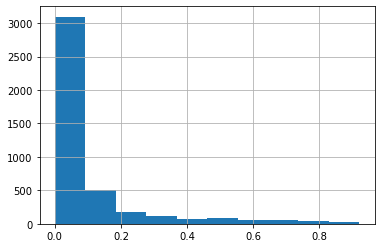

In [154]:
result['pred'].hist()

In [155]:
result.to_csv('CAT_pred.csv',index=False)